In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV,KFold

In [ ]:
#If we are working on time series problem it is important to import datetime library
from datetime import datetime

In [ ]:
#importing files from local machine
from google.colab import files
uploaded=files.upload()

Saving gold prices.csv to gold prices.csv
Saving silver prices.csv to silver prices.csv


In [ ]:
gold_df=pd.read_csv('gold prices.csv')
silver_df=pd.read_csv('silver prices.csv')

In [ ]:
gold_df.info()

In [ ]:
silver_df.info()

In [ ]:
gold_df.head(10)

In [ ]:
silver_df.head()

In [ ]:
gold_df.tail()

In [ ]:
gold_df.shape

(2539, 6)

In [ ]:
silver_df.shape

(2539, 6)

In case of gold futures market, the gold volume represents the amount of contracts that were traded in a given period. The greater the volume, the more powerful the market.

In [ ]:
gold_df.sample(10)

In [ ]:
gold_df.isna().sum()

Date           0
Close/Last     0
Volume        28
Open           0
High           0
Low            0
dtype: int64

In [ ]:
gold_df.dropna(inplace=True)

In [ ]:
gold_df.duplicated().sum()

0

In [ ]:
silver_df.isna().sum()

Date           0
Close/Last     0
Volume        63
Open           0
High           0
Low            0
dtype: int64

In [ ]:
silver_df.dropna(inplace=True)

In [ ]:
gold_df['Date']=pd.to_datetime(gold_df['Date'])

In [ ]:
silver_df['Date']=pd.to_datetime(silver_df['Date'])

In [ ]:
gold_df=gold_df.sort_values(by='Date')

In [ ]:
silver_df=silver_df.sort_values(by='Date')

In [ ]:
gold_df=gold_df.set_index("Date")

In [ ]:
silver_df=silver_df.set_index("Date")

In [ ]:
gold_df=gold_df.resample(rule='W').mean()

In [ ]:
silver_df=silver_df.resample(rule='W').mean()

In [ ]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 522 entries, 2013-08-25 to 2023-08-20
Freq: W-SUN
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close/Last  522 non-null    float64
 1   Volume      522 non-null    float64
 2   Open        522 non-null    float64
 3   High        522 non-null    float64
 4   Low         522 non-null    float64
dtypes: float64(5)
memory usage: 24.5 KB


In [ ]:
gold_df.shape

(522, 5)

In [ ]:
silver_df.shape

(522, 5)

In [ ]:
silver_df.count()

Close/Last    522
Volume        522
Open          522
High          522
Low           522
dtype: int64

In [ ]:
gold_df.sample(5)

Close/Last         Volume         Open         High          Low  \
Date                                                                            
2014-04-30  1298.747619  111595.380952  1297.095238  1306.490476  1290.047619   
2022-10-31  1675.566667  170760.388889  1674.700000  1688.327778  1661.438889   
2019-01-31  1294.500000  181215.380952  1293.709524  1299.547619  1288.800000   
2017-09-30  1318.545000  315730.050000  1321.225000  1326.810000  1311.875000   
2021-02-28  1807.452632  222751.157895  1813.957895  1818.931579  1796.921053   

               Open-EMA  Close/Last-EMA     Volume-EMA     High-EMA  \
Date                                                                  
2014-04-30  1301.040033     1302.060910  111737.950387  1310.772666   
2022-10-31  1676.748083     1678.052524  178978.054835  1691.235130   
2019-01-31  1285.683466     1286.847234  181211.084175  1291.682455   
2017-09-30  1321.028899     1319.804284  315988.849639  1327.666003   
2021-02-28  1827.782112     1823.689523  206382.668116  1834.945915   

                Low-EMA  Close/Last-First Differenting  \
Date                                                     
2014-04-30  1294.082912                       0.576190   
2022-10-31  1663.393992                      -1.316667   
2019-01-31  1280.880912                       2.090476   
2017-09-30  1312.398924                      -1.870000   
2021-02-28  1813.967319                      -6.394737   

            Volume-First Differenting  Open-First Differenting  \
Date                                                             
2014-04-30                 445.714286                 0.028571   
2022-10-31               -2705.500000                -1.238889   
2019-01-31                5078.047619                 2.019048   
2017-09-30               -3923.050000                -1.200000   
2021-02-28                4319.736842                -3.931579   

            High-First Differenting  Low-First Differenting  \
Date                                                          
2014-04-30                -0.042857                0.104762   
2022-10-31                -1.994444               -1.833333   
2019-01-31                 2.123810                2.023810   
2017-09-30                -1.790000               -1.205000   
2021-02-28                -6.173684               -6.226316   

            Volume-12 month Differenting  Open-12 month Differenting  \
Date                                                                   
2014-04-30                  -1545.333333                  -17.580952   
2022-10-31                 -23667.944444                   -8.950000   
2019-01-31                 -10565.904762                   21.023810   
2017-09-30                   5377.950000                    6.300000   
2021-02-28                  41567.578947                  -32.373684   

            High-12 month Differenting  Low-12 month Differenting  \
Date                                                                
2014-04-30                  -18.900000                 -18.157143   
2022-10-31                   -8.183333                  -5.122222   
2019-01-31                   19.895238                  20.966667   
2017-09-30                    3.630000                   3.655000   
2021-02-28                  -36.305263                 -36.778947   

            Close/Last-12 month Differenting  
Date                                          
2014-04-30                        -16.928571  
2022-10-31                         -5.622222  
2019-01-31                         19.961905  
2017-09-30                          2.470000  
2021-02-28                        -36.668421

In [ ]:
gold_df.dtypes

Close/Last    float64
Volume        float64
Open          float64
High          float64
Low           float64
dtype: object

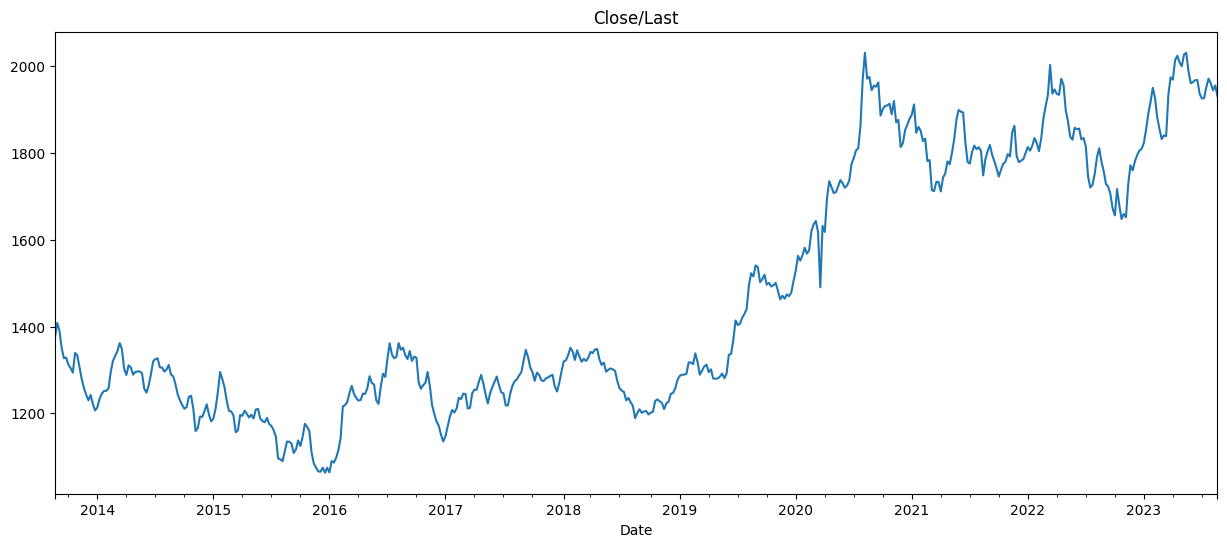

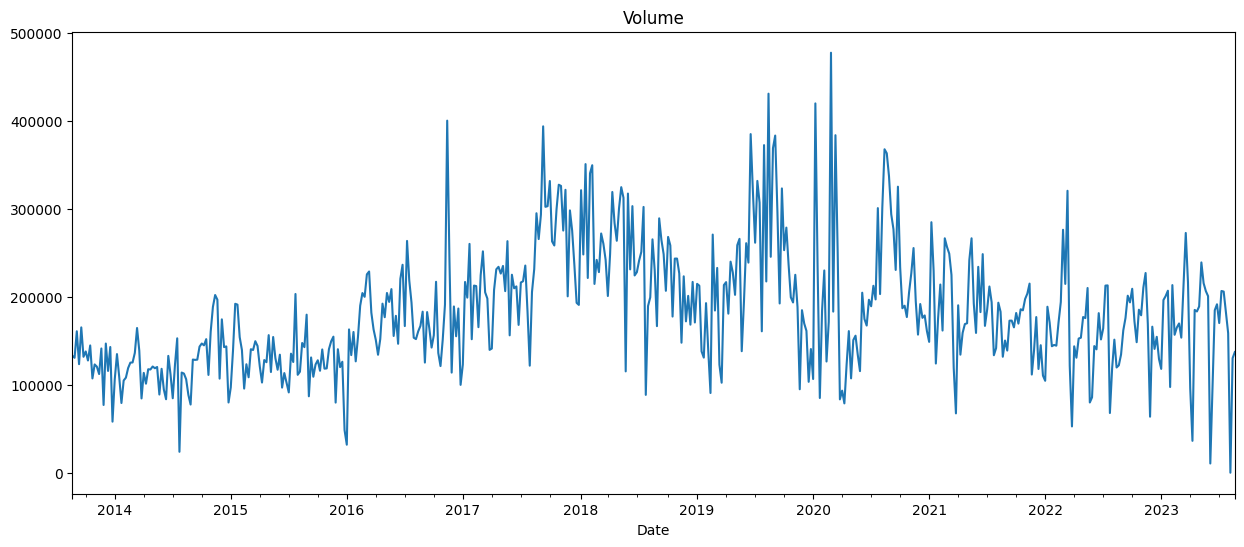

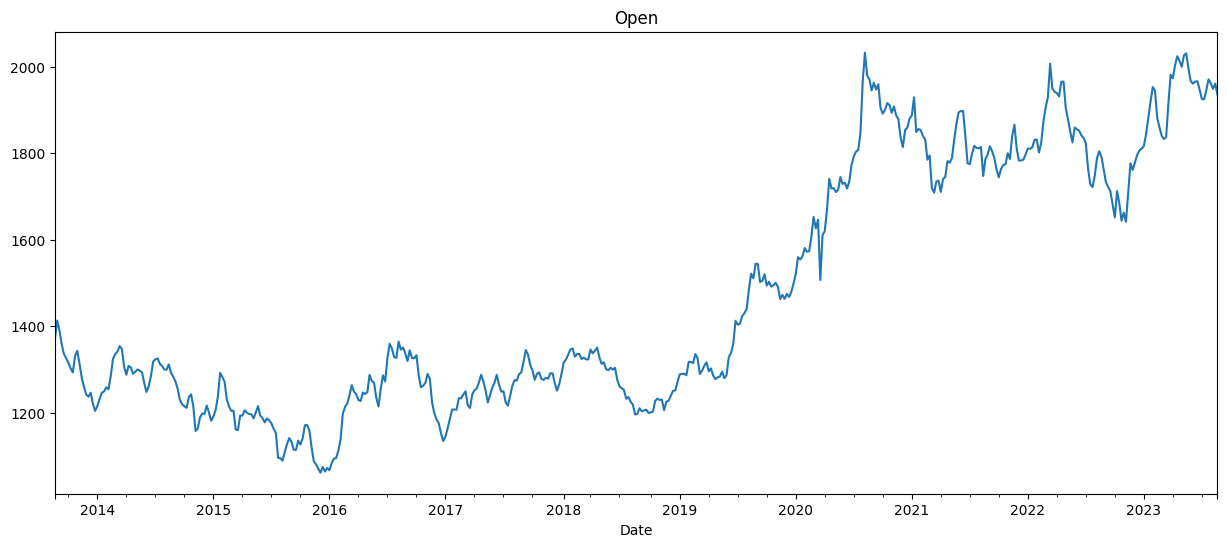

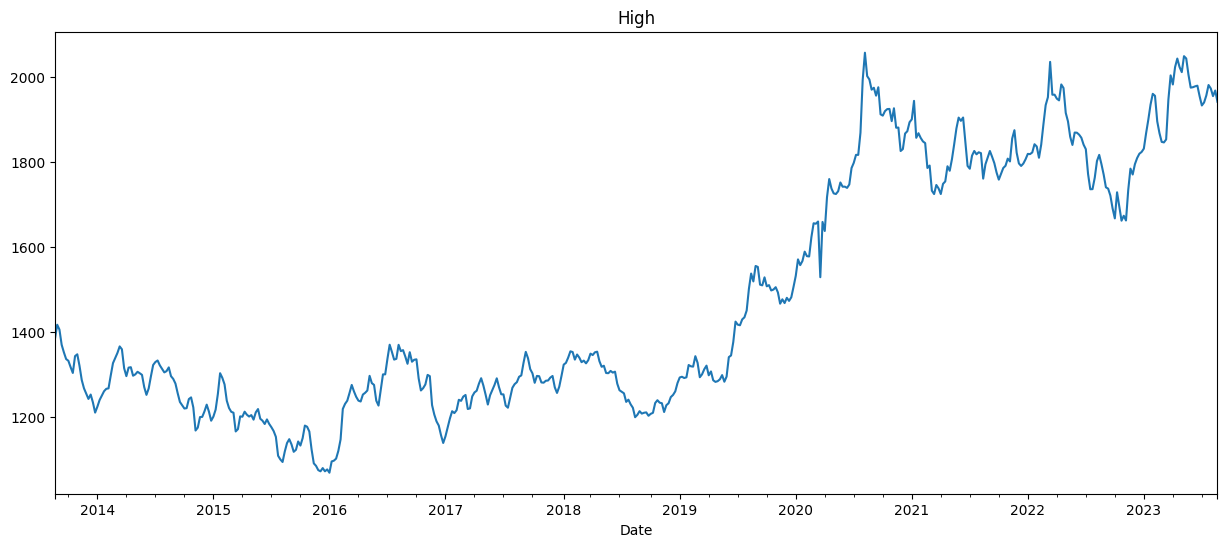

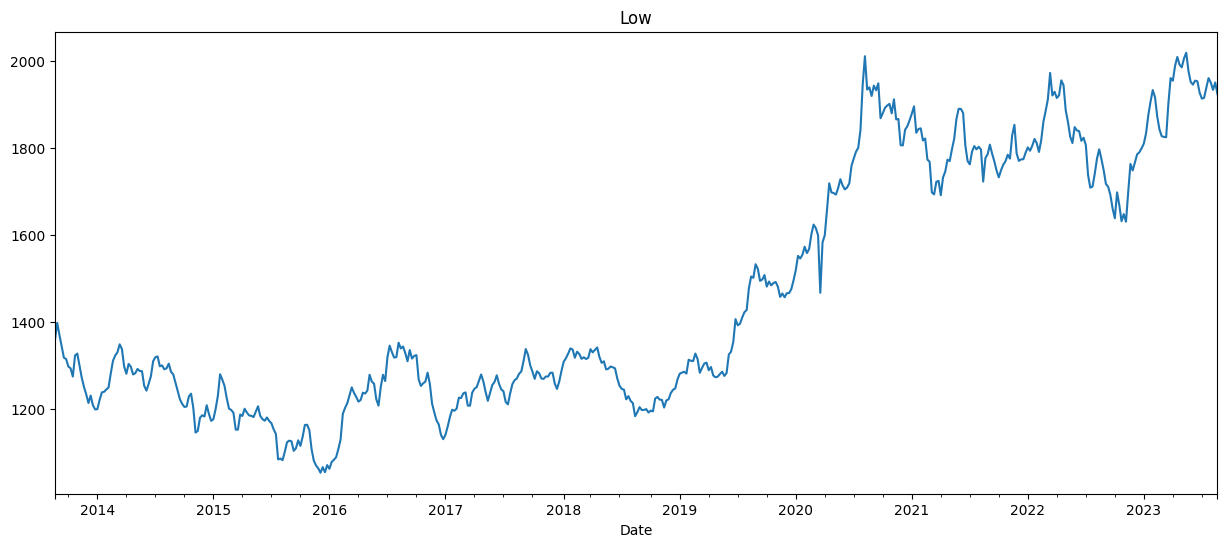

In [ ]:
for column in gold_df.columns:
    if gold_df[column].dtype == 'float64':
        gold_df[column].plot(figsize=(15, 6))
        plt.title(column)
        plt.show()

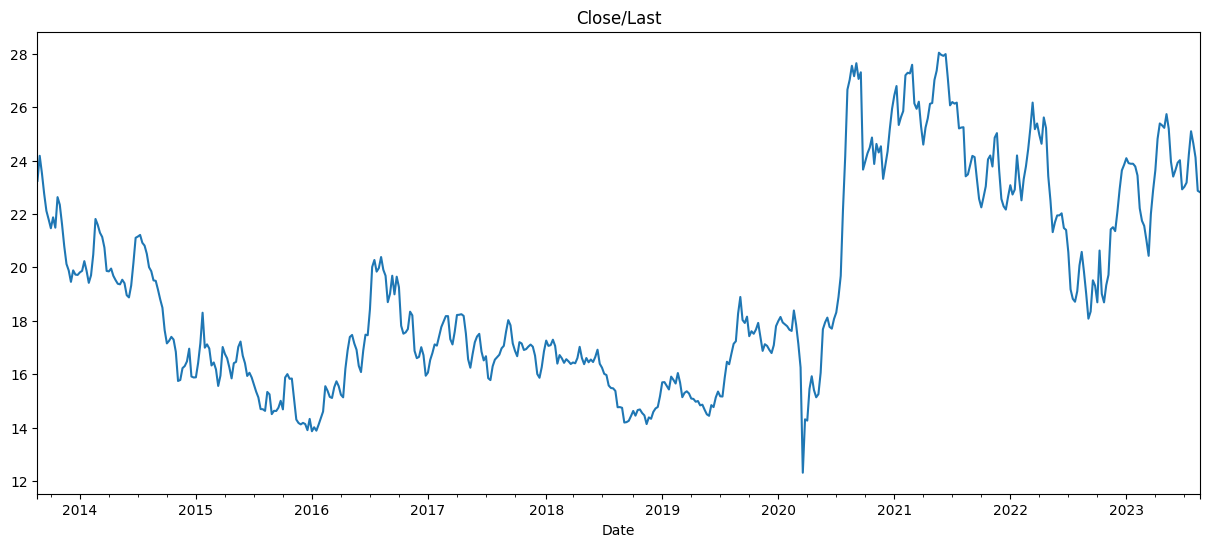

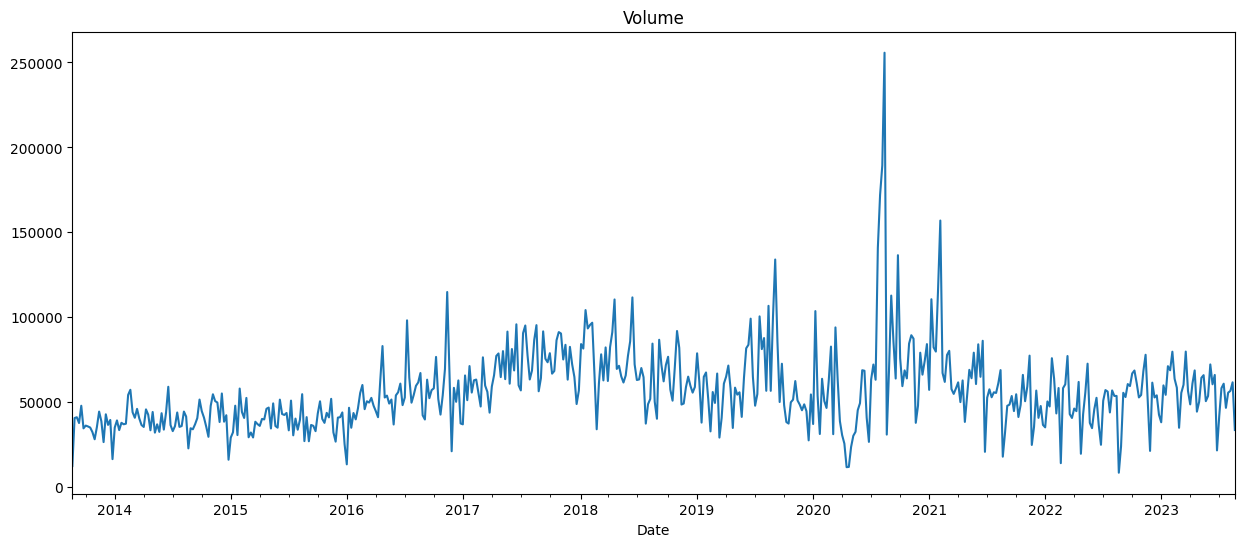

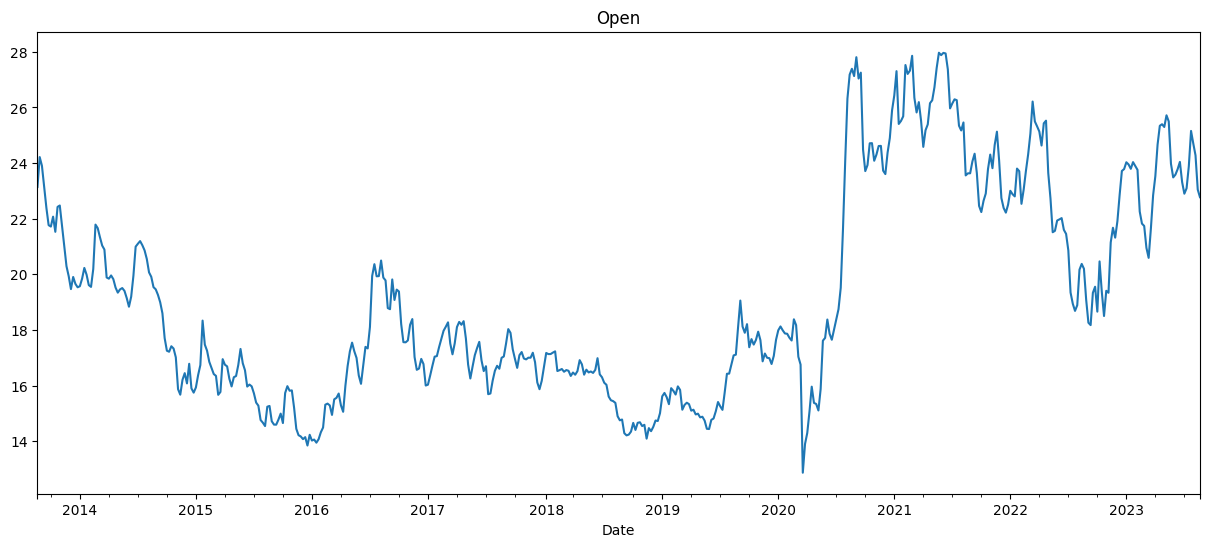

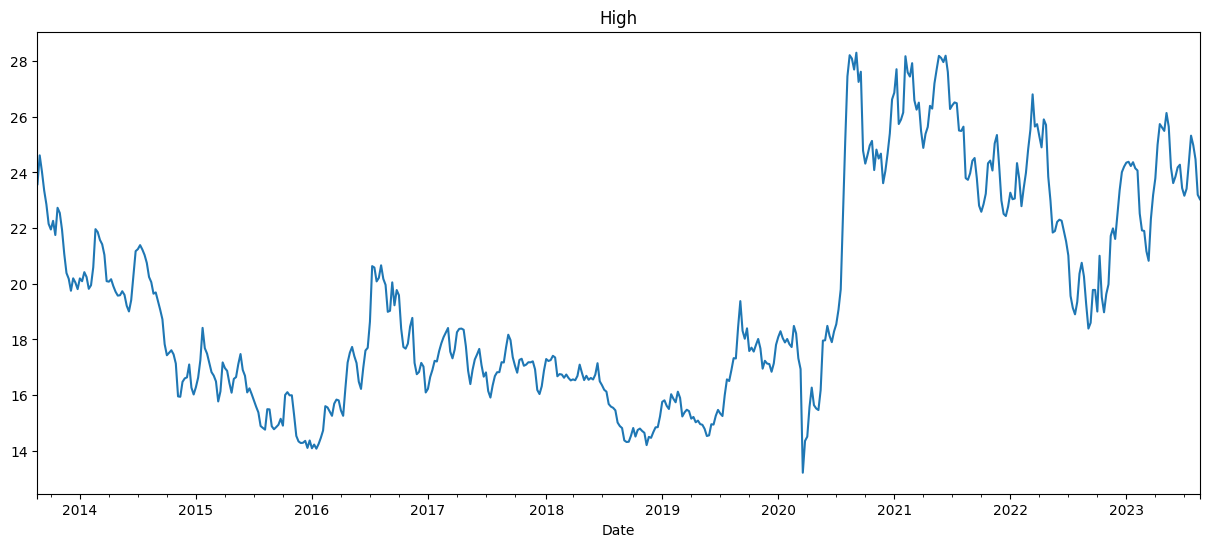

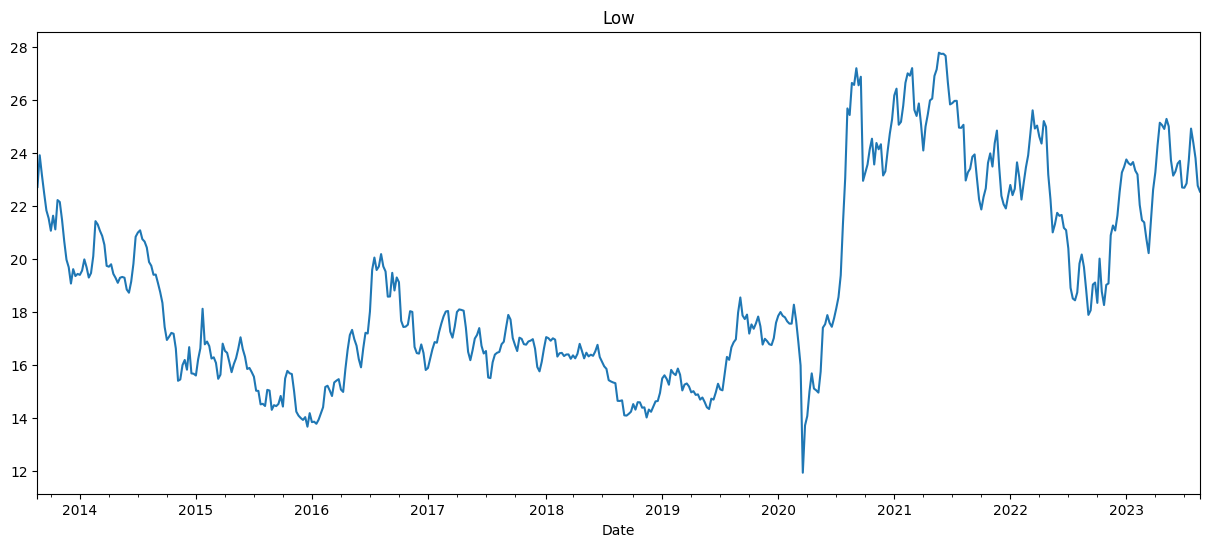

In [ ]:
for column in silver_df:
  if silver_df[column].dtype=="float64":
    silver_df[column].plot(figsize=(15,6))
    plt.title(column)
    plt.show()


In [ ]:
gold_df.head()

Date  Close/Last    Volume    Open    High     Low
0 2023-08-17      1915.2  146770.0  1922.4  1933.5  1914.2
1 2023-08-16      1928.3  124766.0  1933.1  1938.2  1922.0
2 2023-08-15      1935.2  161512.0  1939.4  1944.3  1927.5
3 2023-08-14      1944.0  117514.0  1945.6  1948.2  1934.2
4 2023-08-11      1946.6  119090.0  1944.9  1953.6  1942.7

In [ ]:
gold_df.head()

Close/Last         Volume         Open         High          Low
Date                                                                         
2013-08-31  1391.610000  132267.000000  1391.720000  1401.020000  1378.580000
2013-09-30  1346.080000  143149.350000  1349.265000  1363.950000  1334.560000
2013-10-31  1315.572727  129695.863636  1314.654545  1327.613636  1301.259091
2013-11-30  1275.210000  115698.250000  1277.720000  1286.680000  1267.810000
2013-12-31  1223.919048  117091.190476  1225.738095  1235.033333  1211.309524

In [ ]:
datetime.now()

datetime.datetime(2023, 9, 2, 5, 18, 13, 877162)

When using the .resample() function in pandas, you can specify various rules to control how your time-series data is resampled. The rule parameter determines the frequency at which you want to resample your data. Here are some common rules you can use along with explanations:

'A' or 'Y' - Year-End Frequency:
Resample data to the last day of the year and aggregate using a specified function (e.g., max, mean, etc.).

'Q' - Quarter-End Frequency:
Resample data to the last day of the quarter and aggregate using a specified function.

'M' - Month-End Frequency:
Resample data to the last day of the month and aggregate using a specified function.

'W' - Weekly Frequency:
Resample data to the last day of the week (Sunday by default) and aggregate using a specified function.

'D' - Day Frequency:
Resample data to the specified date and aggregate using a specified function.

'H' - Hourly Frequency:
Resample data to the specified hour and aggregate using a specified function.

'T' or 'min' - Minute Frequency:
Resample data to the specified minute and aggregate using a specified function.

'S' - Second Frequency:
Resample data to the specified second and aggregate using a specified function.

Custom Frequencies:
You can also use custom frequency strings like '2W' for every 2 weeks, '5D' for every 5 days, '3H' for every 3 hours, and so on.

In [ ]:
#just in case if i have to check that in my data what are the minimum and maximum price of the gold the use som resampling techniques
gold_df.resample(rule='A').min()

In [ ]:
high_vals=gold_df.resample(rule='A').max()

In [ ]:
high_vals

In [ ]:
gold_df.resample(rule='A').max()['Open'].plot()

In [ ]:
gold_df.resample(rule='A').min()['Open'].plot()

In [ ]:
gold_df.resample(rule='Q').min()['Open'].plot()

In [ ]:
gold_df.resample(rule='M').min()['Open'].plot()

In [ ]:
gold_df.resample(rule='D').min()['Open'].plot()

In [ ]:
gold_df.resample(rule='W').min()['Open'].plot()

In [ ]:
gold_df.resample(rule='BA').min()['Open'].plot()#BA IS BUSINESS ENDS

In [ ]:
gold_df.resample(rule='BQ').min()['Open'].plot(kind='bar')

#ROLLING
Rolling is a widely used technique in time-series data analysis. It finds applications in various fields and scenarios where understanding trends, patterns, and variations in data over time is crucial. Here are some common use cases where rolling is applied in time-series data analysis:

Financial Data Analysis:

Moving Averages: Rolling is often used to calculate moving averages of stock prices to identify trends and potential buy/sell signals.
Bollinger Bands: A popular indicator that uses rolling statistics to show the volatility and potential overbought/oversold levels of a financial instrument.
Economic Analysis:

GDP Growth: Rolling can be used to calculate rolling averages of GDP growth rates to assess the overall economic trend.
Inflation Rates: Rolling can help smooth out monthly inflation rates to understand the long-term inflation trend.
Weather and Climate Analysis:

Temperature Analysis: Rolling can be used to calculate rolling averages of temperatures to analyze seasonal variations and trends in weather data.
Precipitation Analysis: Rolling can help identify patterns and trends in precipitation levels.
Sales and Marketing Analysis:

Sales Forecasts: Rolling techniques can be applied to historical sales data to identify seasonal patterns and make forecasts.
Campaign Impact: Rolling analysis can show the impact of marketing campaigns over time.
Sensor Data Analysis:

IoT Data: Rolling is used to analyze data from sensors (e.g., temperature sensors) to detect long-term trends and anomalies.
Vibration Analysis: Rolling can help identify patterns in machinery vibration data to predict maintenance needs.
Healthcare and Medical Data:

Patient Vital Signs: Rolling analysis can identify trends in patient vital signs over time, aiding in diagnosis and treatment decisions.
Epidemiological Data: Rolling can reveal long-term trends in disease prevalence and outbreak patterns.
Energy Consumption Analysis:

Electricity Usage: Rolling can help identify seasonal trends in electricity consumption, aiding energy management strategies.
Social Media Analysis:

Social Trends: Rolling analysis can reveal trends in social media engagement, helping businesses adapt their strategies.
Transportation and Traffic Analysis:

Traffic Flow: Rolling can help analyze traffic flow patterns and identify congestion trends.
Quality Control and Manufacturing:

Process Data: Rolling analysis can monitor quality metrics over time to identify shifts or drifts in manufacturing processes.
These are just a few examples of where rolling is applied in time-series data analysis. The technique is versatile and applicable in any domain where you want to identify trends, patterns, and variations in data over time. It helps in transforming noisy and volatile time-series data into more meaningful insights that aid decision-making and forecasting.

In [ ]:
gold_df['Open-10 days rolling']=gold_df['Open'].rolling(window=10).mean()
gold_df['Open-15 days rolling']=gold_df['Open'].rolling(window=15).mean()
gold_df['Open-20 days rolling']=gold_df['Open'].rolling(window=20).mean()
gold_df['Open-30 days rolling']=gold_df['Open'].rolling(window=30).mean()

In [ ]:
gold_df['Close-10 days rolling']=gold_df['Close/Last'].rolling(window=10).mean()
gold_df['Close-15 days rolling']=gold_df['Close/Last'].rolling(window=15).mean()
gold_df['Close-20 days rolling']=gold_df['Close/Last'].rolling(window=20).mean()
gold_df['Close-30 days rolling']=gold_df['Close/Last'].rolling(window=30).mean()

In [ ]:
gold_df['Close-10 days rolling']=gold_df['Close/Last'].rolling(window=10).mean()
gold_df['Close-15 days rolling']=gold_df['Close/Last'].rolling(window=15).mean()
gold_df['Close-20 days rolling']=gold_df['Close/Last'].rolling(window=20).mean()
gold_df['Close-30 days rolling']=gold_df['Close/Last'].rolling(window=30).mean()

In [ ]:
gold_df['Close-10 days rolling']=gold_df['Close/Last'].rolling(window=10).mean()
gold_df['Close-15 days rolling']=gold_df['Close/Last'].rolling(window=15).mean()
gold_df['Close-20 days rolling']=gold_df['Close/Last'].rolling(window=20).mean()
gold_df['Close-30 days rolling']=gold_df['Close/Last'].rolling(window=30).mean()

In [ ]:
gold_df['High-10 days rolling']=gold_df['High'].rolling(window=10).mean()
gold_df['High-15 days rolling']=gold_df['High'].rolling(window=15).mean()
gold_df['High-20 days rolling']=gold_df['High'].rolling(window=20).mean()
gold_df['High-30 days rolling']=gold_df['High'].rolling(window=30).mean()

In [ ]:
gold_df['Low-10 days rolling']=gold_df['Low'].rolling(window=10).mean()
gold_df['Low-15 days rolling']=gold_df['Low'].rolling(window=15).mean()
gold_df['Low-20 days rolling']=gold_df['Low'].rolling(window=20).mean()
gold_df['Low-30 days rolling']=gold_df['Low'].rolling(window=30).mean()

In [ ]:
gold_df['Low-10 days rolling']=gold_df['Low'].rolling(window=10).mean()
gold_df['Low-15 days rolling']=gold_df['Low'].rolling(window=15).mean()
gold_df['Low-20 days rolling']=gold_df['Low'].rolling(window=20).mean()
gold_df['Low-30 days rolling']=gold_df['Low'].rolling(window=30).mean()

In [ ]:
gold_df['Volume-10 days rolling']=gold_df['Volume'].rolling(window=10).mean()
gold_df['Volume-15 days rolling']=gold_df['Volume'].rolling(window=15).mean()
gold_df['Volume-20 days rolling']=gold_df['Volume'].rolling(window=20).mean()
gold_df['Volume-30 days rolling']=gold_df['Volume'].rolling(window=30).mean()

In [ ]:
silver_df['Open-10 days rolling']=silver_df['Open'].rolling(window=10).mean()
silver_df['Open-15 days rolling']=silver_df['Open'].rolling(window=15).mean()
silver_df['Open-20 days rolling']=silver_df['Open'].rolling(window=20).mean()
silver_df['Open-30 days rolling']=silver_df['Open'].rolling(window=30).mean()

In [ ]:
silver_df['Close-10 days rolling']=silver_df['Close/Last'].rolling(window=10).mean()
silver_df['Close-15 days rolling']=silver_df['Close/Last'].rolling(window=15).mean()
silver_df['Close-20 days rolling']=silver_df['Close/Last'].rolling(window=20).mean()
silver_df['Close-30 days rolling']=silver_df['Close/Last'].rolling(window=30).mean()

In [ ]:
silver_df['Close-10 days rolling']=silver_df['Close/Last'].rolling(window=10).mean()
silver_df['Close-15 days rolling']=silver_df['Close/Last'].rolling(window=15).mean()
silver_df['Close-20 days rolling']=silver_df['Close/Last'].rolling(window=20).mean()
silver_df['Close-30 days rolling']=silver_df['Close/Last'].rolling(window=30).mean()

In [ ]:
silver_df['Close-10 days rolling']=silver_df['Close/Last'].rolling(window=10).mean()
silver_df['Close-15 days rolling']=silver_df['Close/Last'].rolling(window=15).mean()
silver_df['Close-20 days rolling']=silver_df['Close/Last'].rolling(window=20).mean()
silver_df['Close-30 days rolling']=silver_df['Close/Last'].rolling(window=30).mean()

In [ ]:
silver_df['High-10 days rolling']=silver_df['High'].rolling(window=10).mean()
silver_df['High-15 days rolling']=silver_df['High'].rolling(window=15).mean()
silver_df['High-20 days rolling']=silver_df['High'].rolling(window=20).mean()
silver_df['High-30 days rolling']=silver_df['High'].rolling(window=30).mean()

In [ ]:
silver_df['Low-10 days rolling']=silver_df['Low'].rolling(window=10).mean()
silver_df['Low-15 days rolling']=silver_df['Low'].rolling(window=15).mean()
silver_df['Low-20 days rolling']=silver_df['Low'].rolling(window=20).mean()
silver_df['Low-30 days rolling']=silver_df['Low'].rolling(window=30).mean()

In [ ]:
silver_df['Low-10 days rolling']=silver_df['Low'].rolling(window=10).mean()
silver_df['Low-15 days rolling']=silver_df['Low'].rolling(window=15).mean()
silver_df['Low-20 days rolling']=silver_df['Low'].rolling(window=20).mean()
silver_df['Low-30 days rolling']=silver_df['Low'].rolling(window=30).mean()

In [ ]:
silver_df['Volume-10 days rolling']=silver_df['Volume'].rolling(window=10).mean()
silver_df['Volume-15 days rolling']=silver_df['Volume'].rolling(window=15).mean()
silver_df['Volume-20 days rolling']=silver_df['Volume'].rolling(window=20).mean()
silver_df['Volume-30 days rolling']=silver_df['Volume'].rolling(window=30).mean()

<Axes: xlabel='Date'>

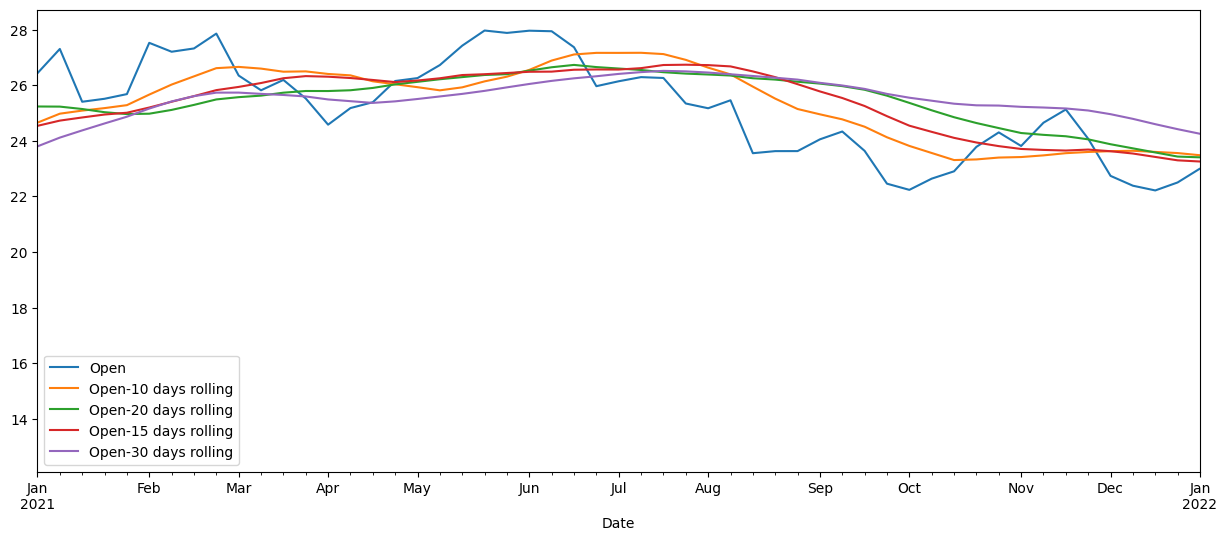

In [ ]:
#Analyzing the Open curve with different days of rolling
silver_df[['Open','Open-10 days rolling','Open-20 days rolling','Open-15 days rolling','Open-30 days rolling']].plot(figsize=(15,6),xlim=('2021-01-01','2022-01-01'))

<Axes: xlabel='Date'>

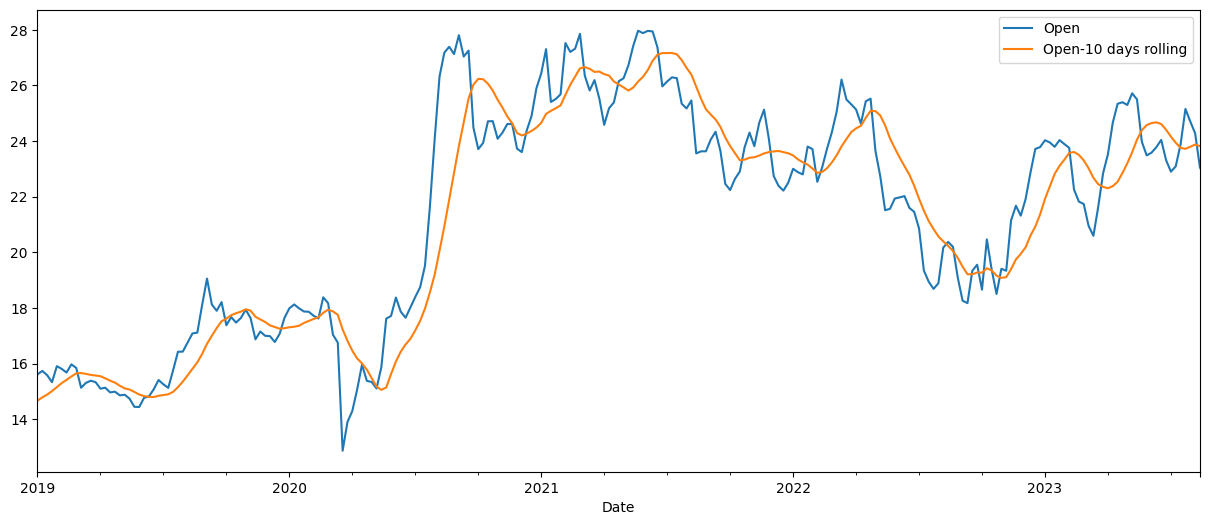

In [ ]:
#Analyzing the Open curve with different days of rolling
silver_df[['Open','Open-10 days rolling']].plot(figsize=(15,6),xlim=('2019-01-01','2023-08-10'))

<Axes: xlabel='Date'>

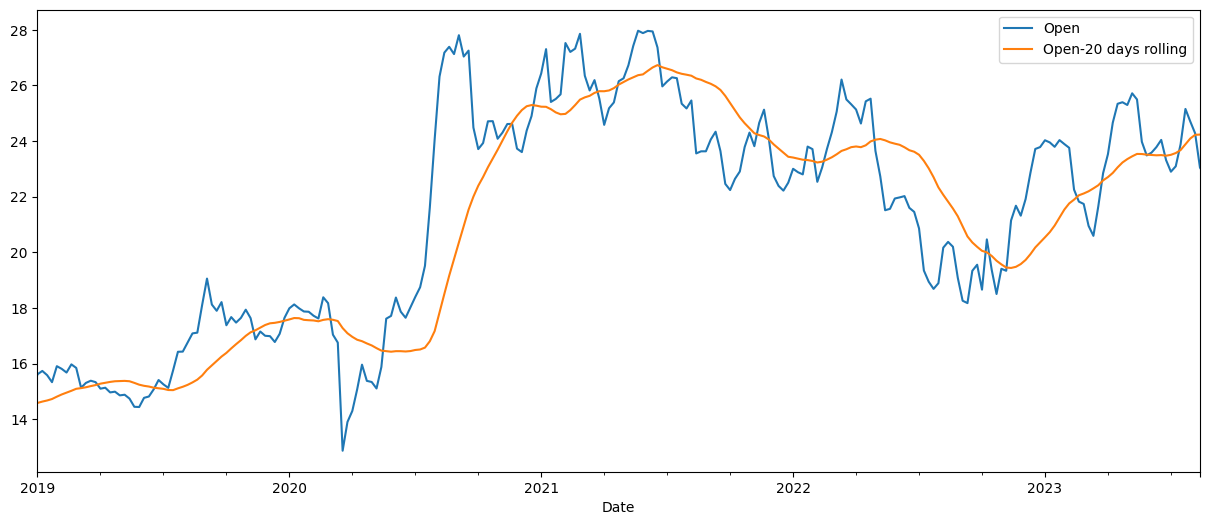

In [ ]:
silver_df[['Open','Open-20 days rolling']].plot(figsize=(15,6),xlim=('2019-01-01','2023-08-10'))

<Axes: xlabel='Date'>

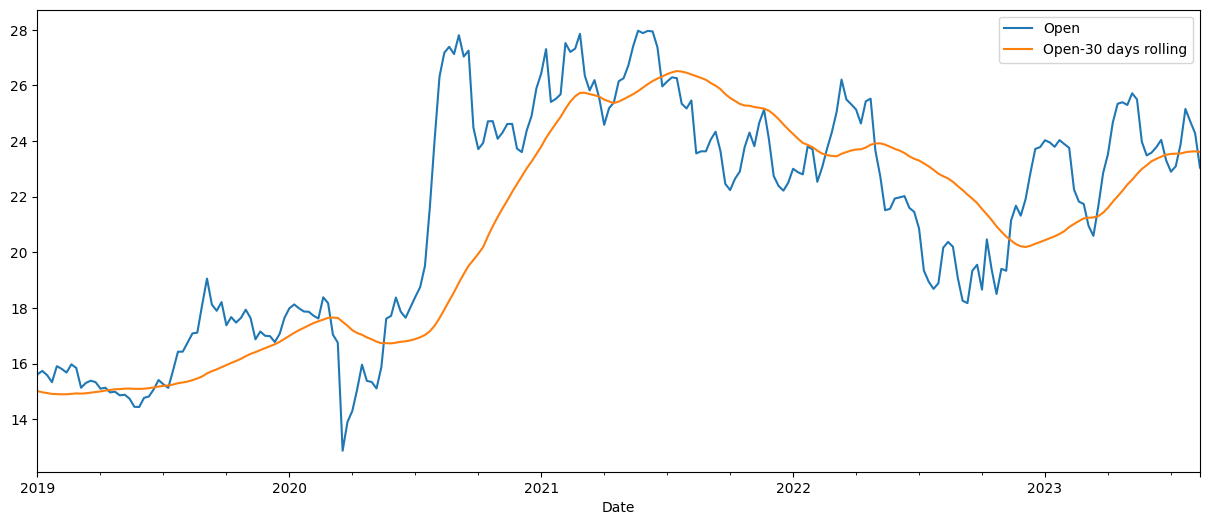

In [ ]:
silver_df[['Open','Open-30 days rolling']].plot(figsize=(15,6),xlim=('2019-01-01','2023-08-10'))

<Axes: xlabel='Date'>

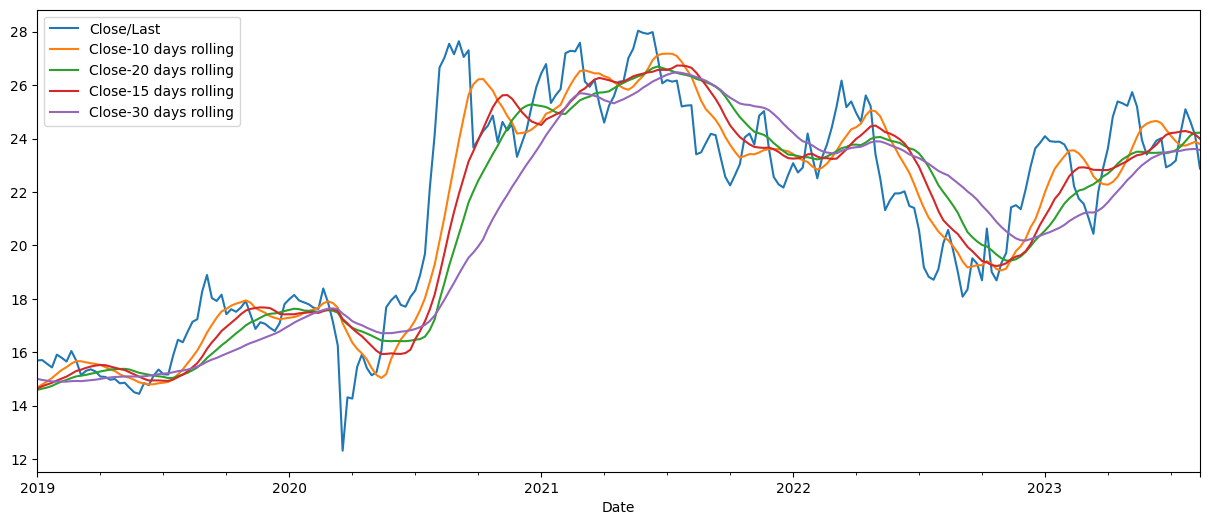

In [ ]:
#Analyzing the Open curve with different days of rolling
silver_df[['Close/Last','Close-10 days rolling','Close-20 days rolling','Close-15 days rolling','Close-30 days rolling']].plot(figsize=(15,6),xlim=('2019-01-01','2023-08-10'))

<Axes: xlabel='Date'>

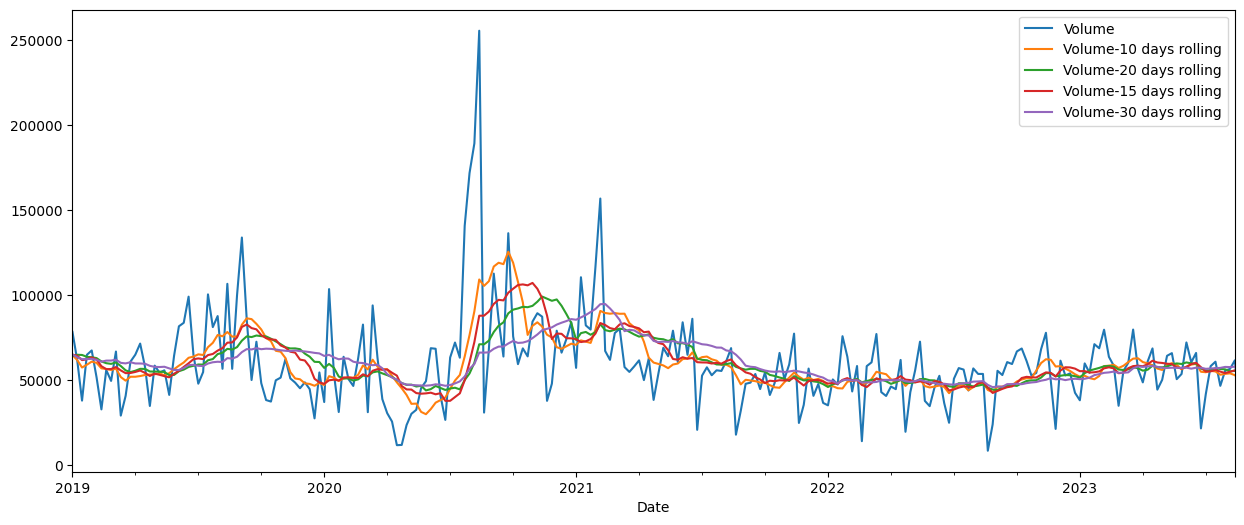

In [ ]:
#Analyzing the Volume curve with different days of rolling
silver_df[['Volume','Volume-10 days rolling','Volume-20 days rolling','Volume-15 days rolling','Volume-30 days rolling']].plot(figsize=(15,6),xlim=('2019-01-01','2023-08-10'))

<Axes: xlabel='Date'>

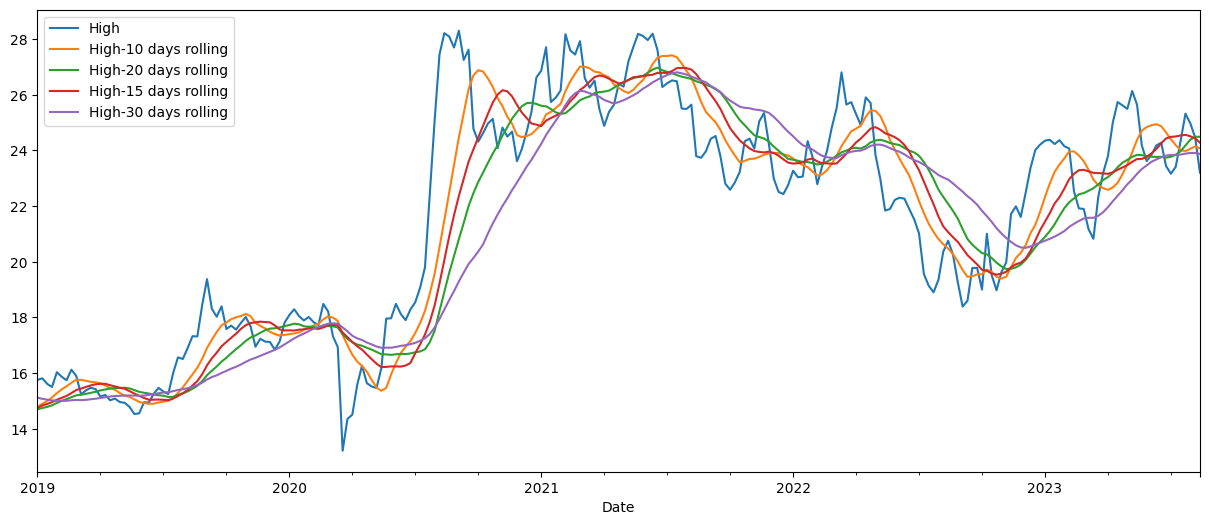

In [ ]:
#Analyzing the Volume curve with different days of rolling
silver_df[['High','High-10 days rolling','High-20 days rolling','High-15 days rolling','High-30 days rolling']].plot(figsize=(15,6),xlim=('2019-01-01','2023-08-10'))

<Axes: xlabel='Date'>

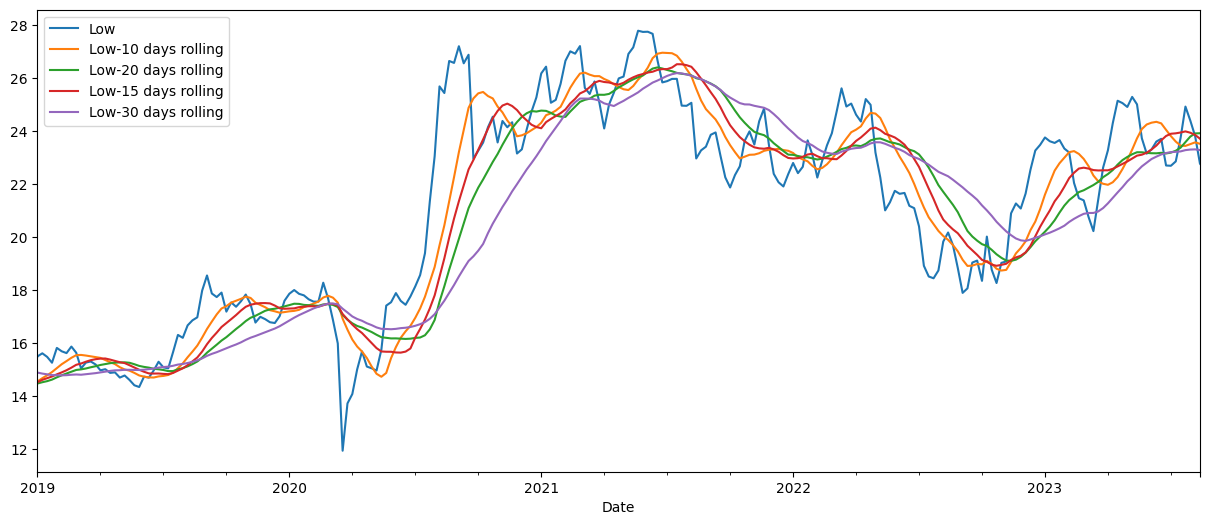

In [ ]:
#Analyzing the Volume curve with different days of rolling
silver_df[['Low','Low-10 days rolling','Low-20 days rolling','Low-15 days rolling','Low-30 days rolling']].plot(figsize=(15,6),xlim=('2019-01-01','2023-08-10'))

<Axes: xlabel='Date'>

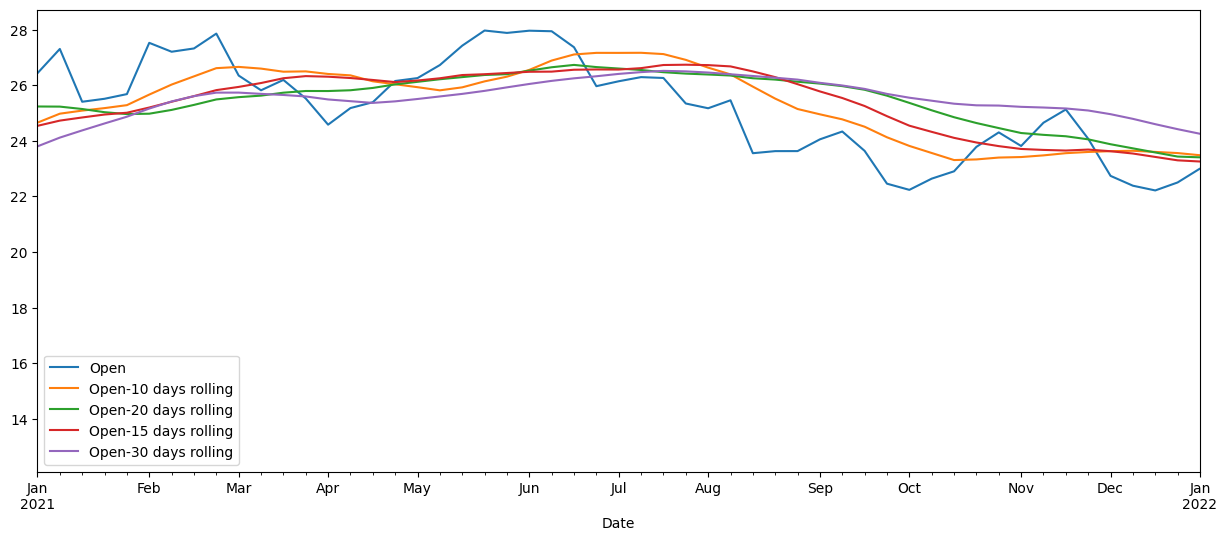

In [ ]:
#Analyzing the Open curve with different days of rolling
silver_df[['Open','Open-10 days rolling','Open-20 days rolling','Open-15 days rolling','Open-30 days rolling']].plot(figsize=(15,6),xlim=('2021-01-01','2022-01-01'))

<Axes: xlabel='Date'>

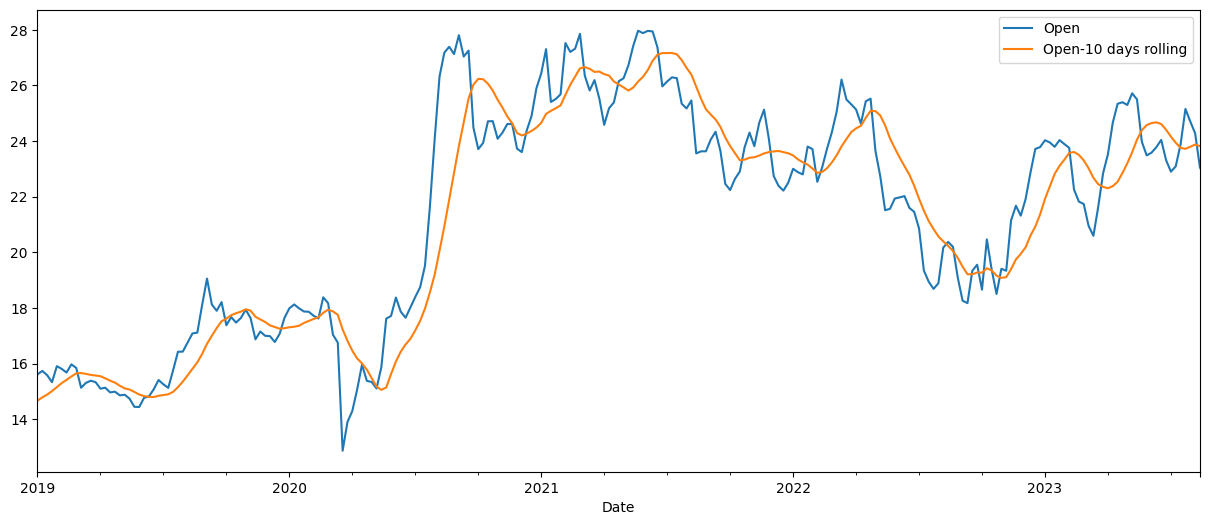

In [ ]:
#Analyzing the Open curve with different days of rolling
silver_df[['Open','Open-10 days rolling']].plot(figsize=(15,6),xlim=('2019-01-01','2023-08-10'))

<Axes: xlabel='Date'>

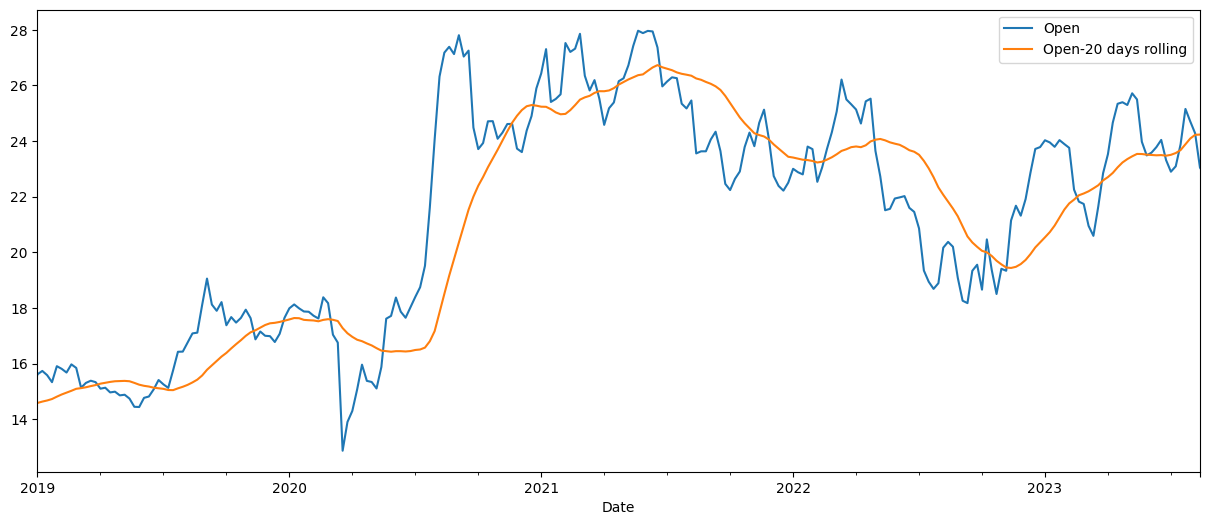

In [ ]:
silver_df[['Open','Open-20 days rolling']].plot(figsize=(15,6),xlim=('2019-01-01','2023-08-10'))

<Axes: xlabel='Date'>

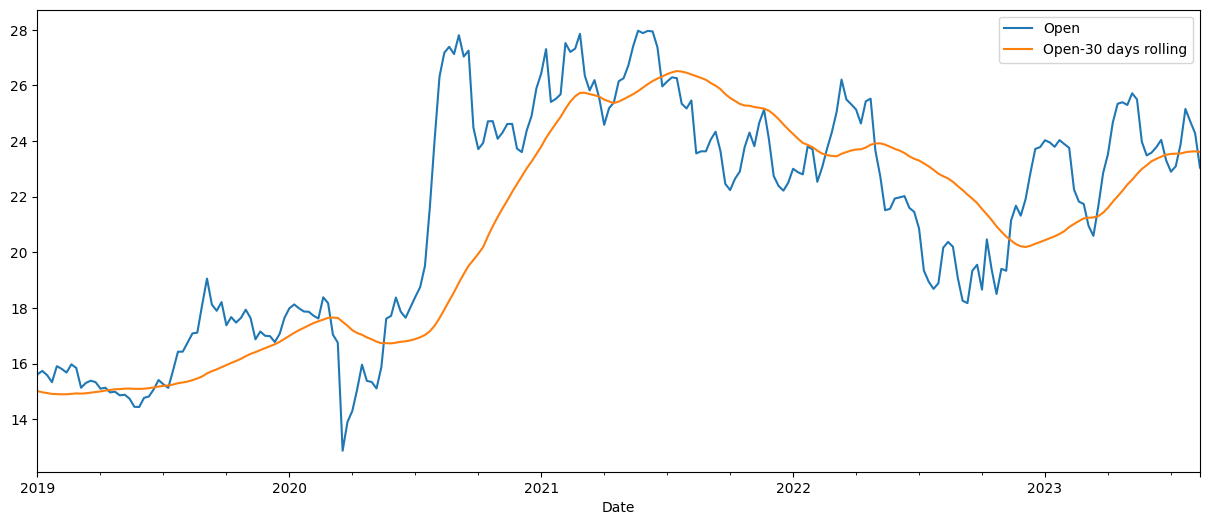

In [ ]:
silver_df[['Open','Open-30 days rolling']].plot(figsize=(15,6),xlim=('2019-01-01','2023-08-10'))

In [ ]:
#Analyzing the Open curve with different weeks of rolling
gold_df[['Close/Last','Close-10 days rolling','Close-20 days rolling','Close-15 days rolling','Close-30 days rolling']].plot(figsize=(15,6),xlim=('2019-01-01','2023-08-10'))

In [ ]:
#Analyzing the Volume curve with different days of rolling
gold_df[['Volume','Volume-10 days rolling','Volume-20 days rolling','Volume-15 days rolling','Volume-30 days rolling']].plot(figsize=(15,6),xlim=('2019-01-01','2023-08-10'))

In [ ]:
#Analyzing the Volume curve with different days of rolling
gold_df[['High','High-10 days rolling','High-20 days rolling','High-15 days rolling','High-30 days rolling']].plot(figsize=(15,6),xlim=('2019-01-01','2023-08-10'))

In [ ]:
#Analyzing the Volume curve with different days of rolling
gold_df[['Low','Low-10 days rolling','Low-20 days rolling','Low-15 days rolling','Low-30 days rolling']].plot(figsize=(15,6),xlim=('2019-01-01','2023-08-10'))

The Cumulative Moving Average (CMA) is useful in scenarios where you want to track the average of a dataset as new data points are added over time. It provides a stable representation of the central tendency of the data, considering all available data points equally up to a specific time step. Here are some situations where CMA can be particularly beneficial:

Process Monitoring and Control: In manufacturing and quality control, CMA can be used to track the average measurements of a process over time. This helps identify shifts or deviations from the expected average, which could indicate issues in the production process.

Financial Data Analysis: CMA can be used to track the average value of financial metrics like stock prices, exchange rates, or commodity prices. It provides a long-term perspective on trends and helps in understanding the overall direction of the market.

Resource Management: CMA can help in managing resources like energy consumption, water usage, or equipment performance. By tracking the average values, you can identify periods of increased or decreased resource utilization.

Customer Satisfaction Tracking: In customer service, CMA can be used to track customer satisfaction scores over time. It helps in understanding the overall satisfaction trend and can guide improvements in service quality.

Healthcare Data Analysis: CMA can be applied to track patient data such as vital signs or laboratory test results over time. It aids in monitoring patient progress and identifying any long-term trends or anomalies.

Historical Data Analysis: CMA provides a comprehensive view of historical data, making it useful for historical research and analysis. It can be used in fields like archaeology, demography, and historical economics.

Educational Assessment: CMA can be used to track students' performance over time. It helps educators understand the overall progress of students and identify any trends in academic performance.

Sensor Data Analysis: For sensor data collected over time, CMA can be used to track the average sensor readings. This is especially useful when dealing with noisy data and you want a stable representation of the sensor's measurements.

In these scenarios, CMA offers a straightforward way to monitor and understand data trends without the need to specify window sizes or assign different weights to data points. However, it's important to note that CMA may not be suitable when you want to give more weight to recent data or when you want to be responsive to short-term fluctuations. In such cases, techniques like Exponential Weighted Moving Average (EWMA) might be more appropriate.

In [ ]:
gold_df['Open-CMA']=gold_df['Open'].expanding().mean()#Cumulative moving average
gold_df['Close/Last-CMA']=gold_df['Close/Last'].expanding().mean()
gold_df['Volume-CMA']=gold_df['Volume'].expanding().mean()
gold_df['High-CMA']=gold_df['High'].expanding().mean()
gold_df['Low-CMA']=gold_df['Low'].expanding().mean()

In [ ]:
gold_df[['Open-CMA','Open']].plot(figsize=(15,6),xlim=('2020-01-01','2021-08-10'))
gold_df[['Close/Last-CMA','Close/Last']].plot(figsize=(15,6),xlim=('2020-01-01','2021-08-10'))
gold_df[['Volume-CMA','Volume']].plot(figsize=(15,6),xlim=('2020-01-01','2021-08-10'))
gold_df[['High-CMA','High']].plot(figsize=(15,6),xlim=('2020-01-01','2021-08-10'))
gold_df[['Low-CMA','Low']].plot(figsize=(15,6),xlim=('2020-01-01','2021-08-10'))

In [ ]:
silver_df['Open-CMA']=gold_df['Open'].expanding().mean()#Cumulative moving average
silver_df['Close/Last-CMA']=gold_df['Close/Last'].expanding().mean()
silver_df['Volume-CMA']=gold_df['Volume'].expanding().mean()
silver_df['High-CMA']=gold_df['High'].expanding().mean()
silver_df['Low-CMA']=gold_df['Low'].expanding().mean()

<Axes: xlabel='Date'>

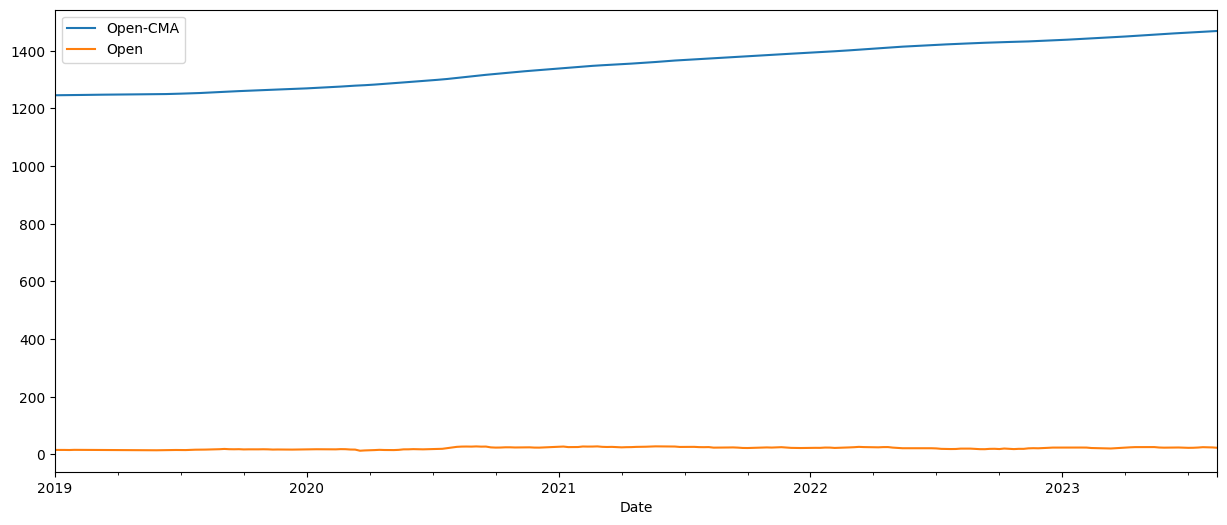

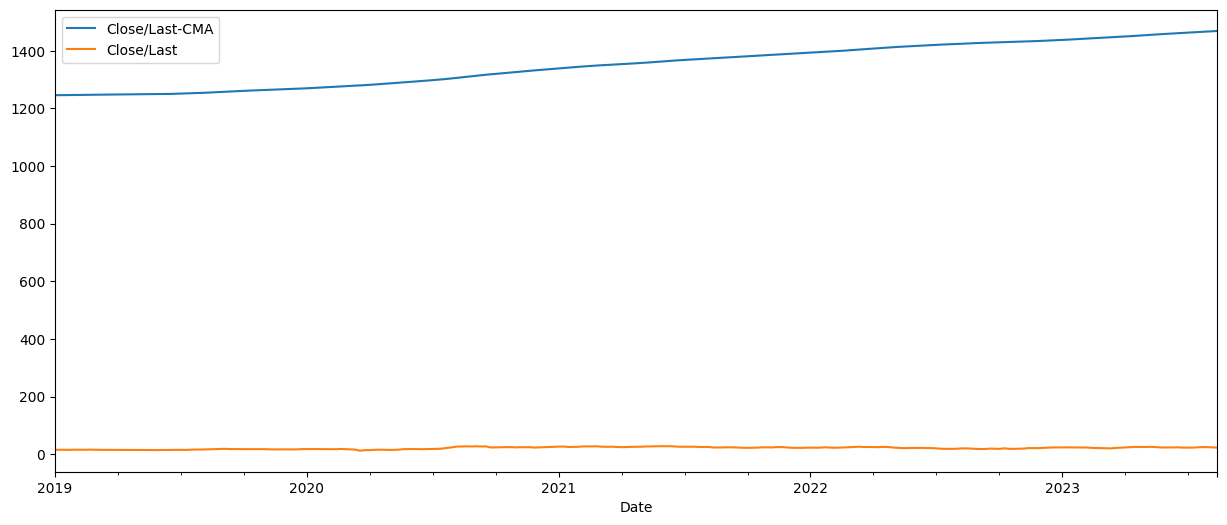

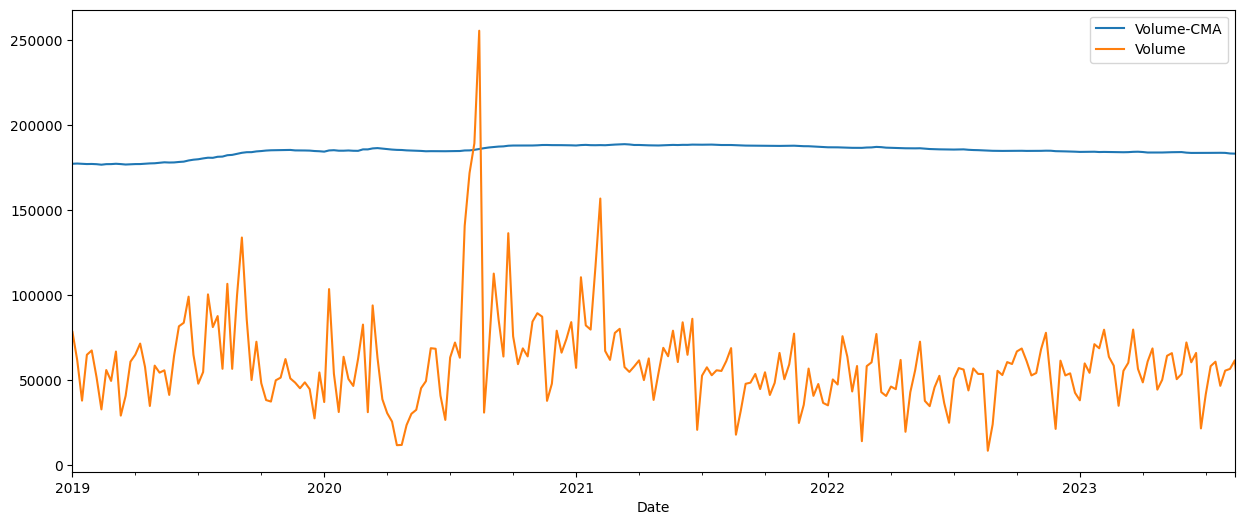

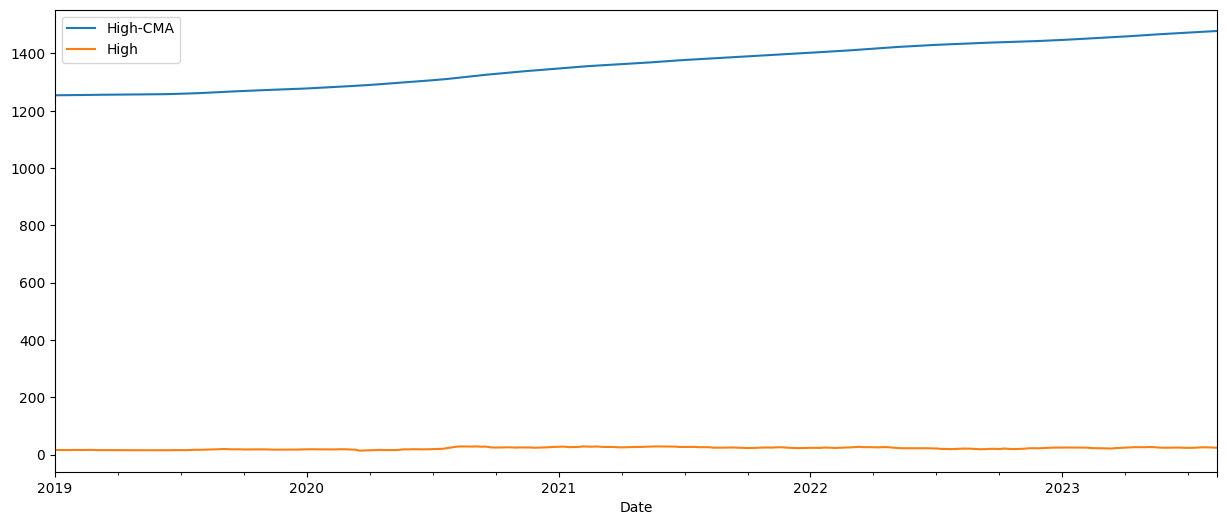

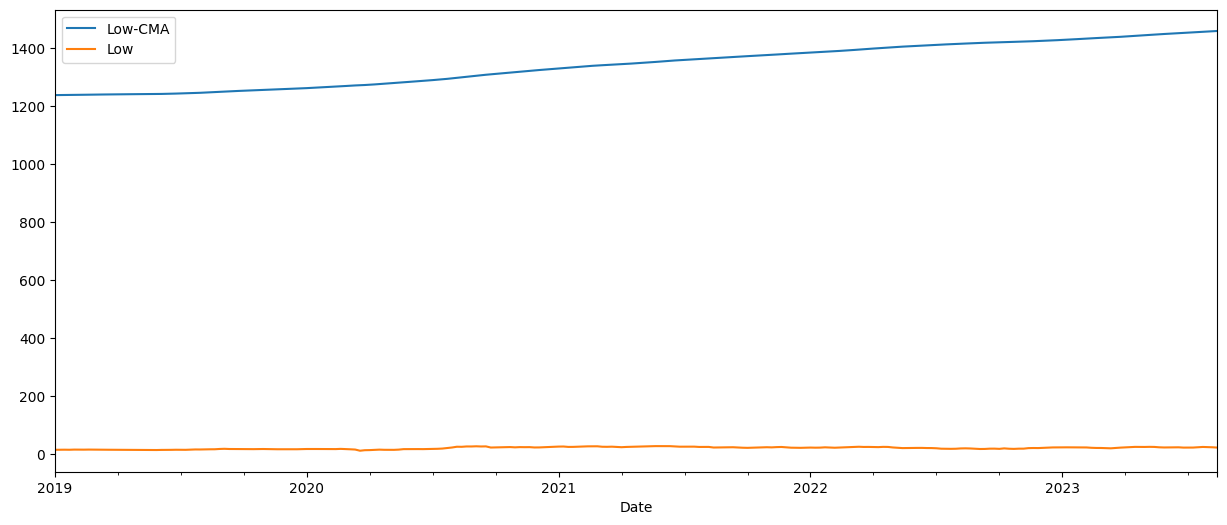

In [ ]:
silver_df[['Open-CMA','Open']].plot(figsize=(15,6),xlim=('2019-01-01','2023-08-10'))
silver_df[['Close/Last-CMA','Close/Last']].plot(figsize=(15,6),xlim=('2019-01-01','2023-08-10'))
silver_df[['Volume-CMA','Volume']].plot(figsize=(15,6),xlim=('2019-01-01','2023-08-10'))
silver_df[['High-CMA','High']].plot(figsize=(15,6),xlim=('2019-01-01','2023-08-10'))
silver_df[['Low-CMA','Low']].plot(figsize=(15,6),xlim=('2019-01-01','2023-08-10'))

#Exponential moving average

In [ ]:
gold_df['Open-EMA']=gold_df['Open'].ewm(alpha=0.181818,adjust=False).mean()
gold_df['Close/Last-EMA']=gold_df['Close/Last'].ewm(alpha=0.181818,adjust=False).mean()
gold_df['Volume-EMA']=gold_df['Volume'].ewm(alpha=0.181818,adjust=False).mean()
gold_df['High-EMA']=gold_df['High'].ewm(alpha=0.181818,adjust=False).mean()
gold_df['Low-EMA']=gold_df['Low'].ewm(alpha=0.181818,adjust=False).mean()

<Axes: xlabel='Date'>

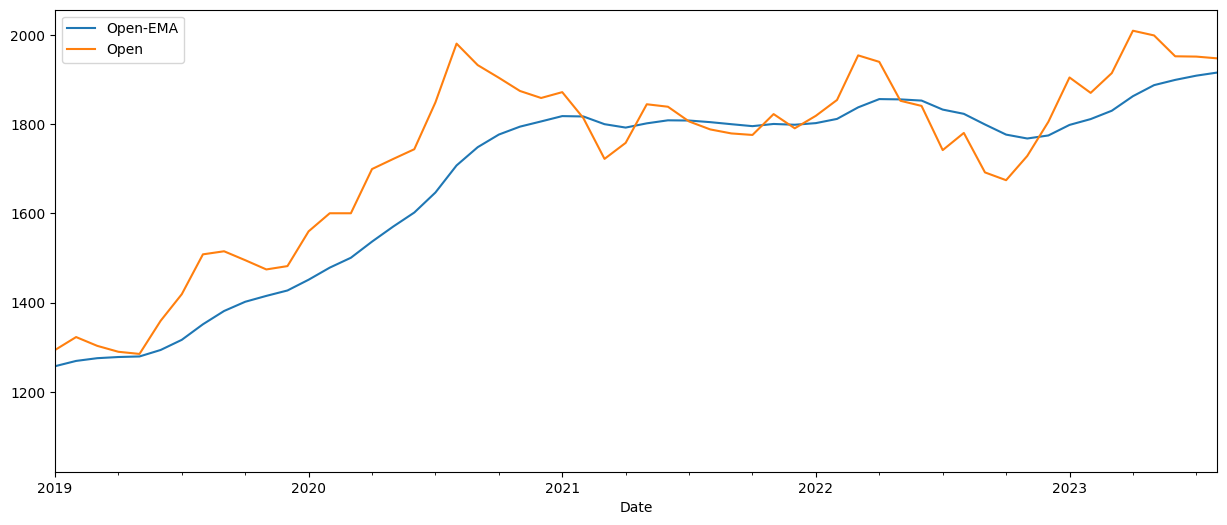

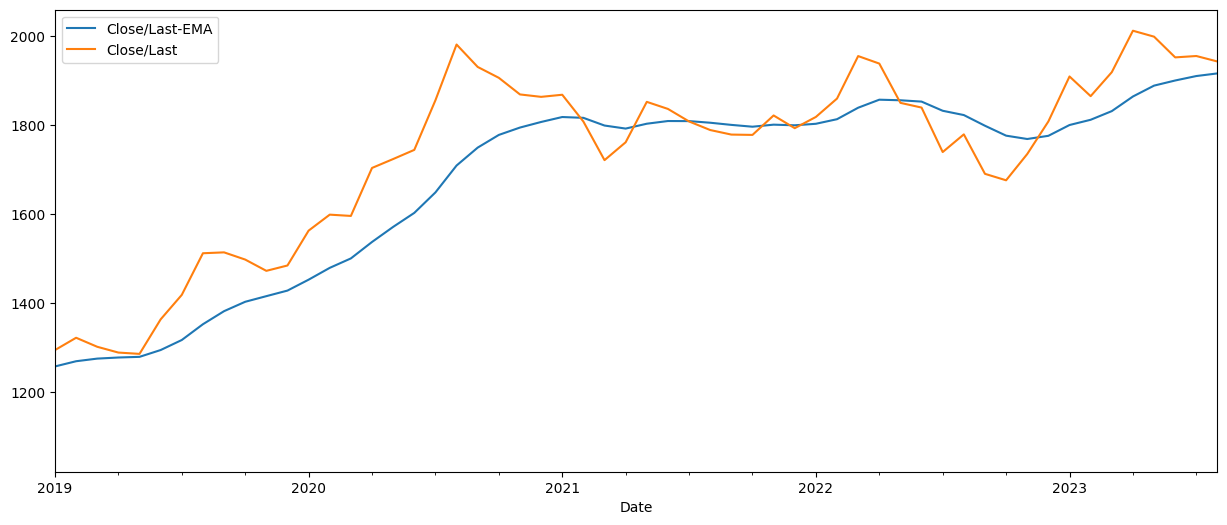

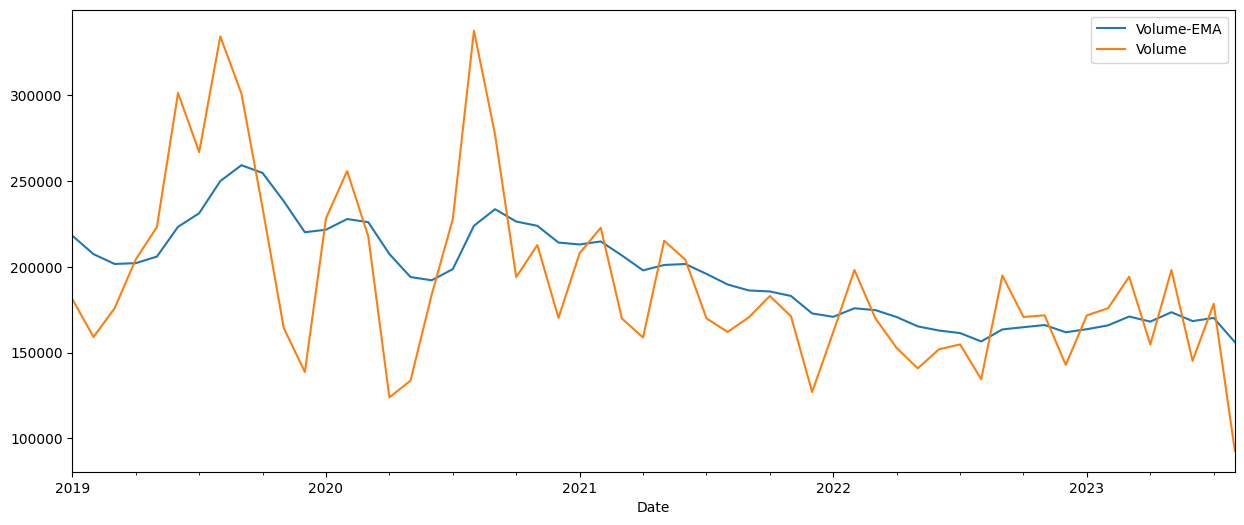

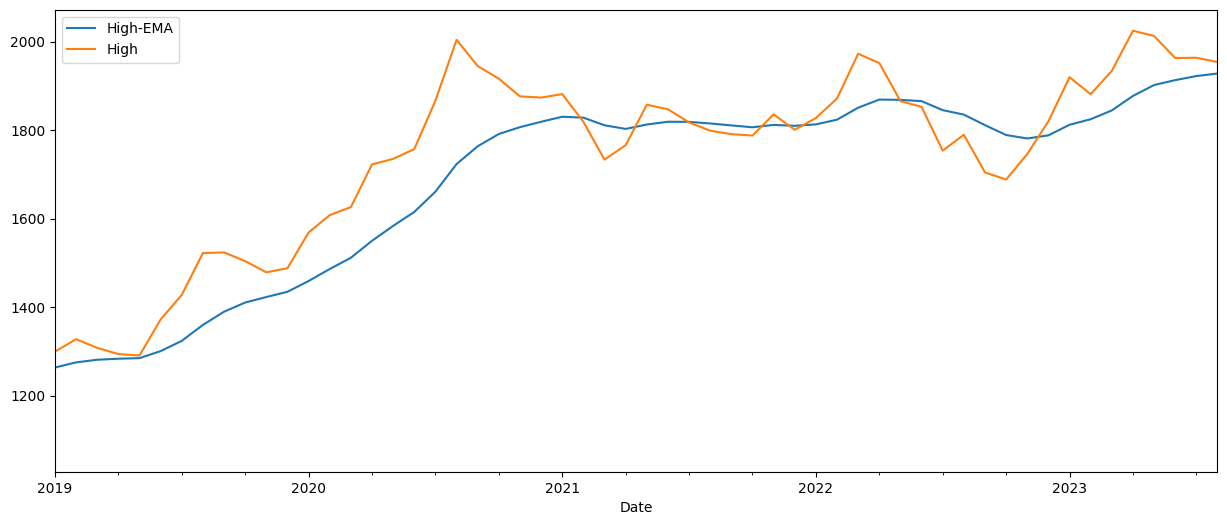

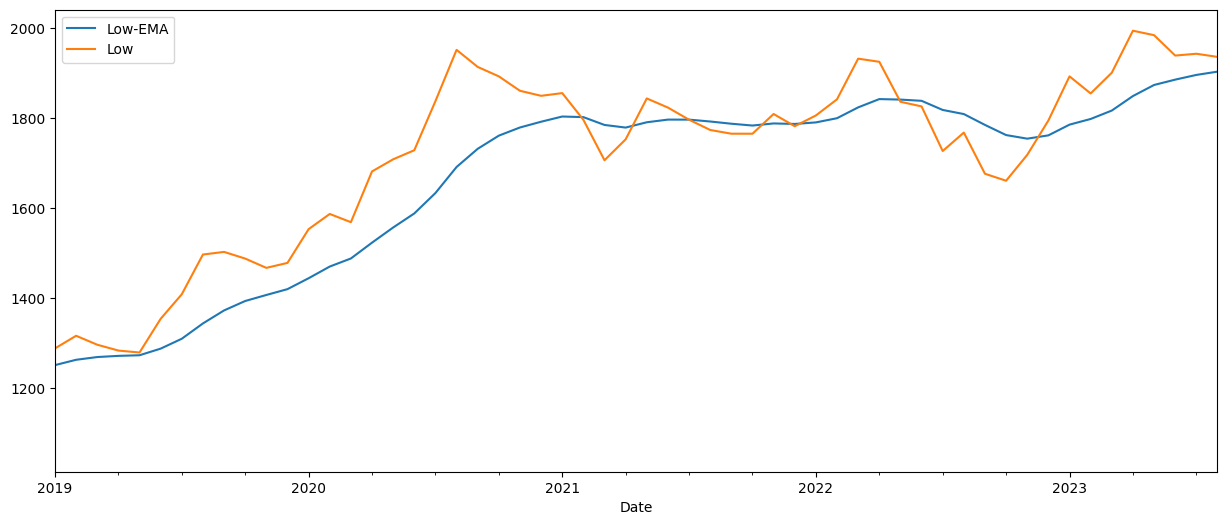

In [ ]:
gold_df[['Open-EMA','Open']].plot(figsize=(15,6),xlim=('2019-01-01','2023-08-10'))
gold_df[['Close/Last-EMA','Close/Last']].plot(figsize=(15,6),xlim=('2019-01-01','2023-08-10'))
gold_df[['Volume-EMA','Volume']].plot(figsize=(15,6),xlim=('2019-01-01','2023-08-10'))
gold_df[['High-EMA','High']].plot(figsize=(15,6),xlim=('2019-01-01','2023-08-10'))
gold_df[['Low-EMA','Low']].plot(figsize=(15,6),xlim=('2019-01-01','2023-08-10'))

In [ ]:
silver_df['Open-EMA']=gold_df['Open'].ewm(alpha=0.181818,adjust=False).mean()
silver_df['Close/Last-EMA']=gold_df['Close/Last'].ewm(alpha=0.181818,adjust=False).mean()
silver_df['Volume-EMA']=gold_df['Volume'].ewm(alpha=0.181818,adjust=False).mean()
silver_df['High-EMA']=gold_df['High'].ewm(alpha=0.181818,adjust=False).mean()
silver_df['Low-EMA']=gold_df['Low'].ewm(alpha=0.181818,adjust=False).mean()

<Axes: xlabel='Date'>

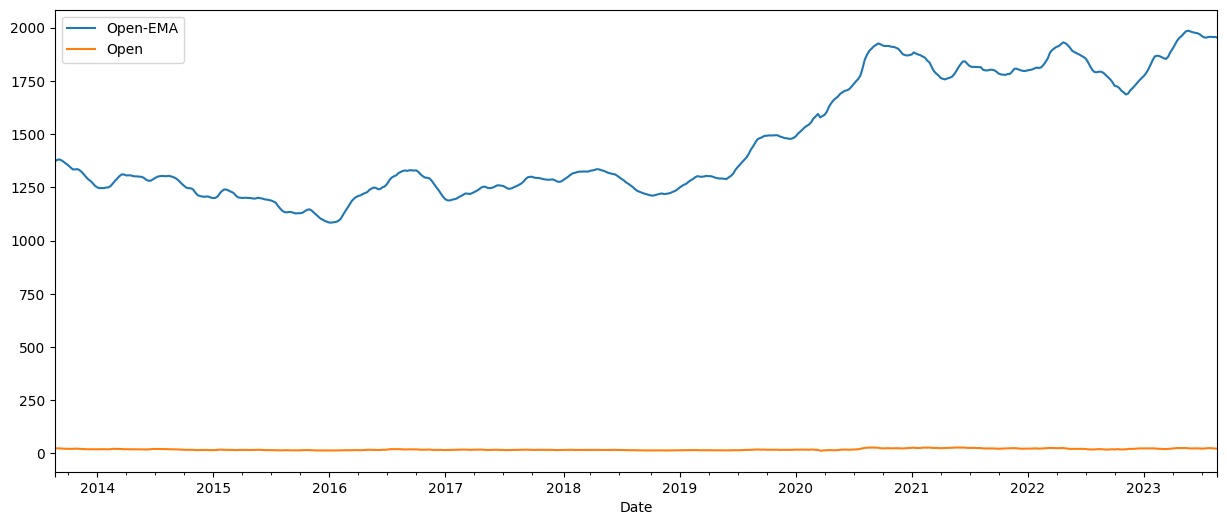

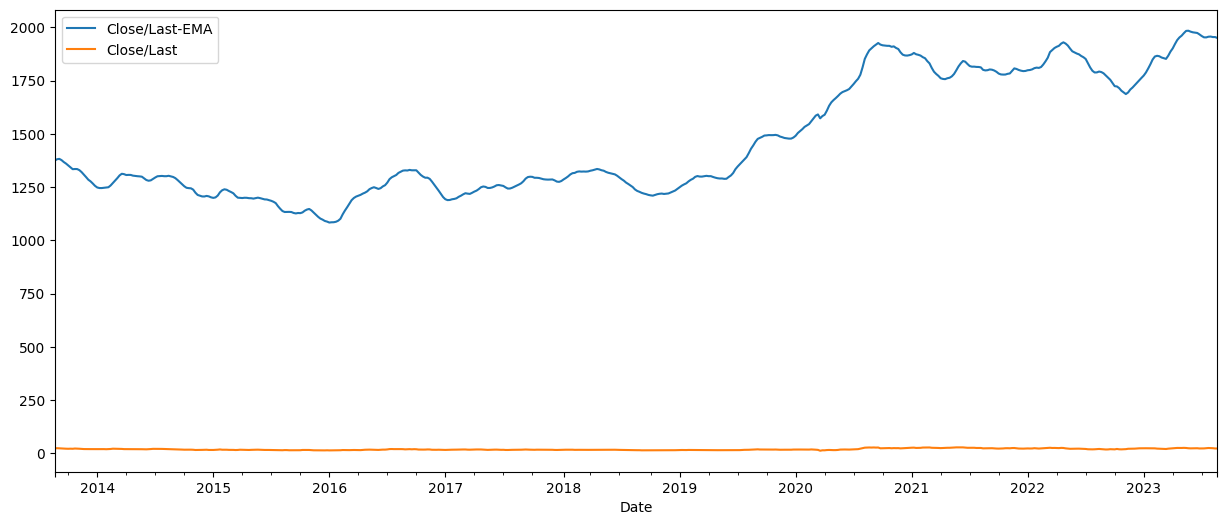

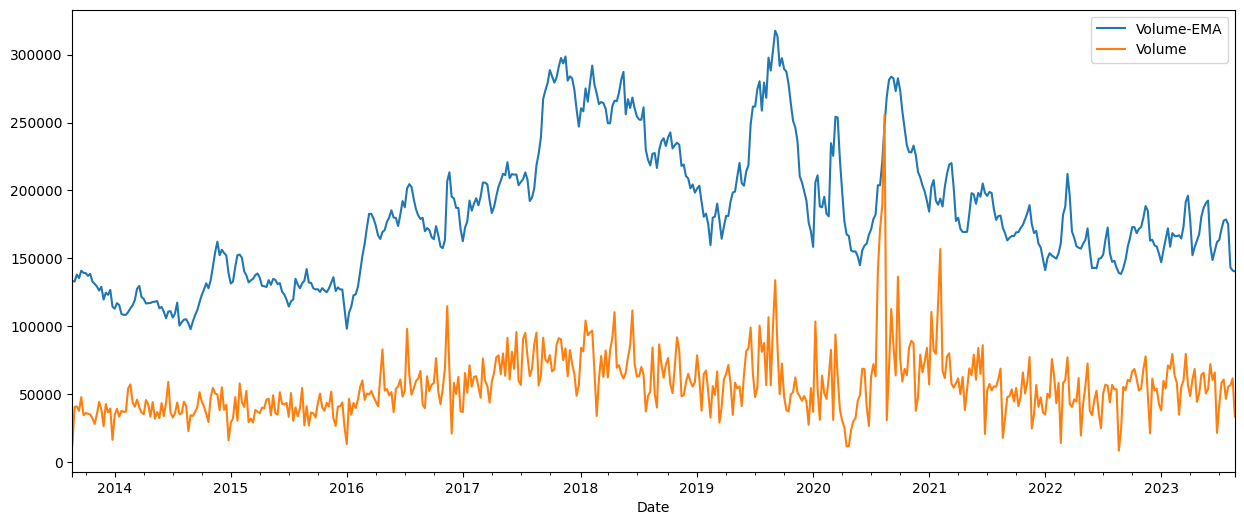

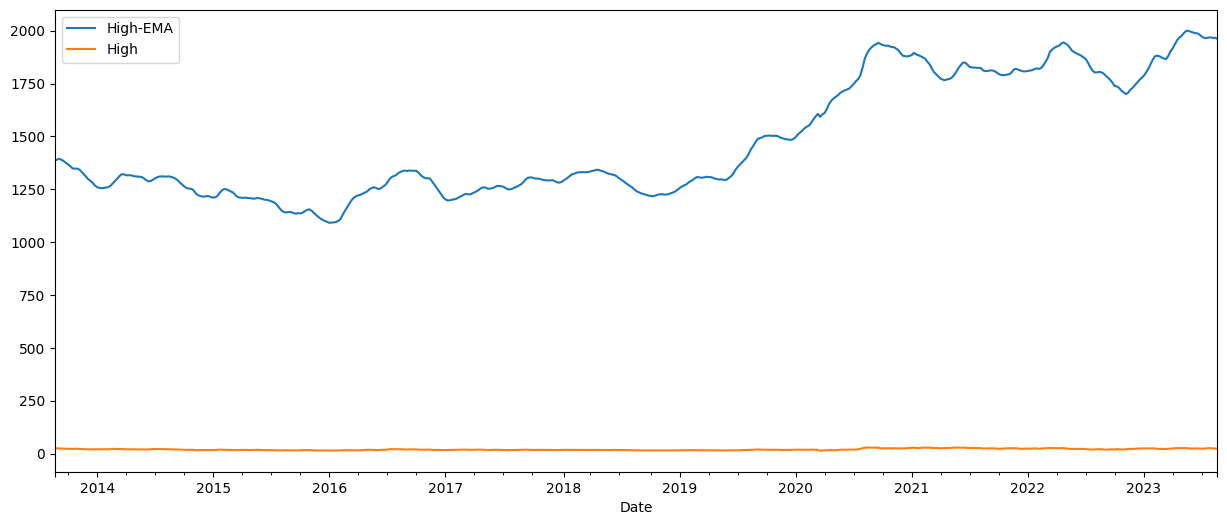

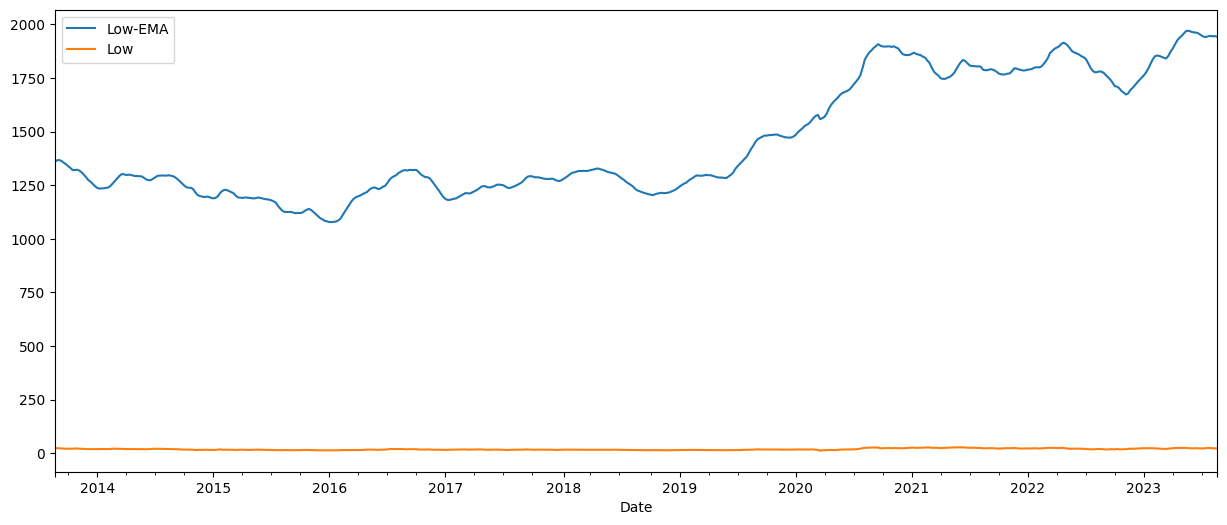

In [ ]:
silver_df[['Open-EMA','Open']].plot(figsize=(15,6))
silver_df[['Close/Last-EMA','Close/Last']].plot(figsize=(15,6))
silver_df[['Volume-EMA','Volume']].plot(figsize=(15,6))
silver_df[['High-EMA','High']].plot(figsize=(15,6))
silver_df[['Low-EMA','Low']].plot(figsize=(15,6))

In [ ]:
#Comparing SMA,CMA,EMA WHICH ONE IS BEST WITH GRAPH

In [ ]:
gold_df[['Open-EMA','Open','Open-CMA','Open-10 days rolling']].plot(figsize=(15,6),xlim=('2022-01-01','2023-08-10'))

In [ ]:
gold_df[['Close/Last-EMA','Close/Last','Close/Last-CMA','Close-10 days rolling']].plot(figsize=(15,6),xlim=('2022-01-01','2023-08-10'))

In [ ]:
gold_df[['High-EMA','High','High-CMA','High-10 days rolling']].plot(figsize=(15,6),xlim=('2022-01-01','2023-08-10'))

In [ ]:
gold_df[['Low-EMA','Low','Low-CMA','Low-10 days rolling']].plot(figsize=(15,6),xlim=('2022-01-01','2023-08-10'))

In [ ]:
gold_df[['Volume-EMA','Volume','Volume-CMA','Volume-10 days rolling']].plot(figsize=(15,6),xlim=('2022-01-01','2023-08-10'))

<Axes: xlabel='Date'>

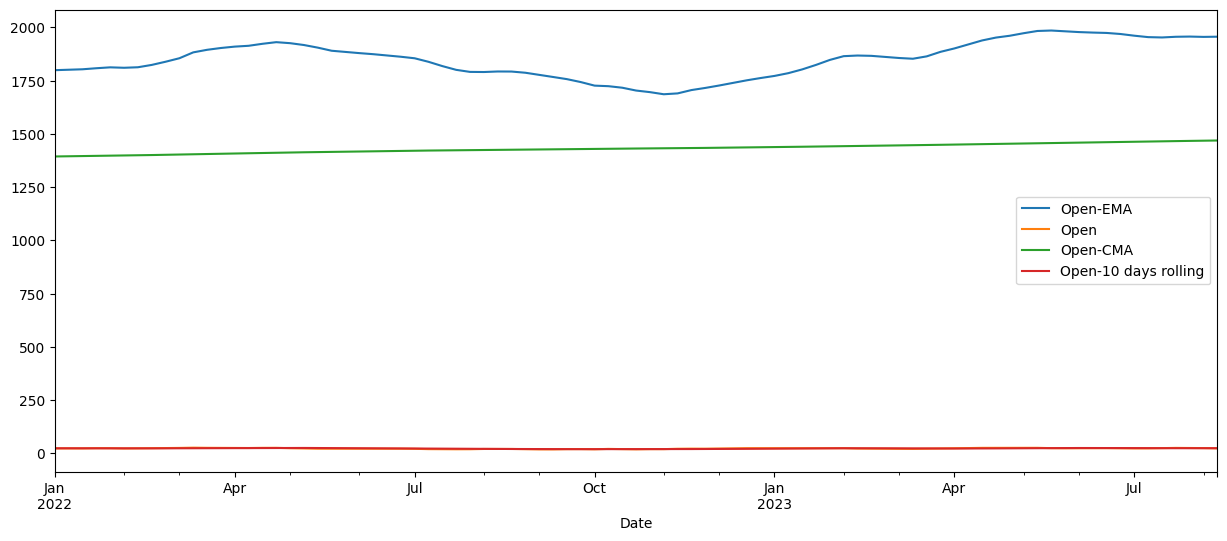

In [ ]:
silver_df[['Open-EMA','Open','Open-CMA','Open-10 days rolling']].plot(figsize=(15,6),xlim=('2022-01-01','2023-08-10'))

<Axes: xlabel='Date'>

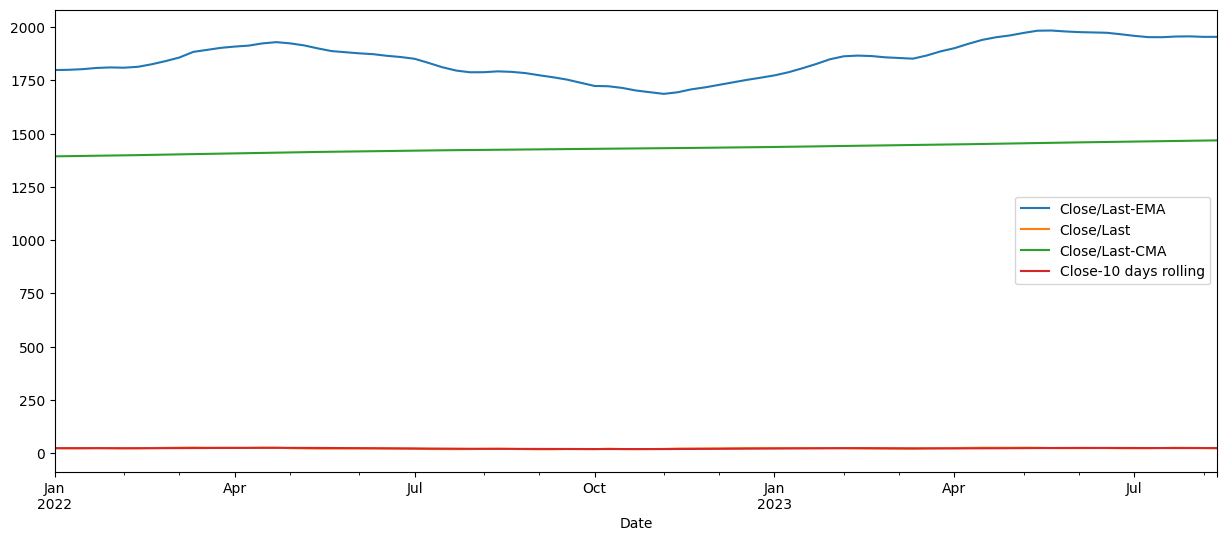

In [ ]:
silver_df[['Close/Last-EMA','Close/Last','Close/Last-CMA','Close-10 days rolling']].plot(figsize=(15,6),xlim=('2022-01-01','2023-08-10'))

<Axes: xlabel='Date'>

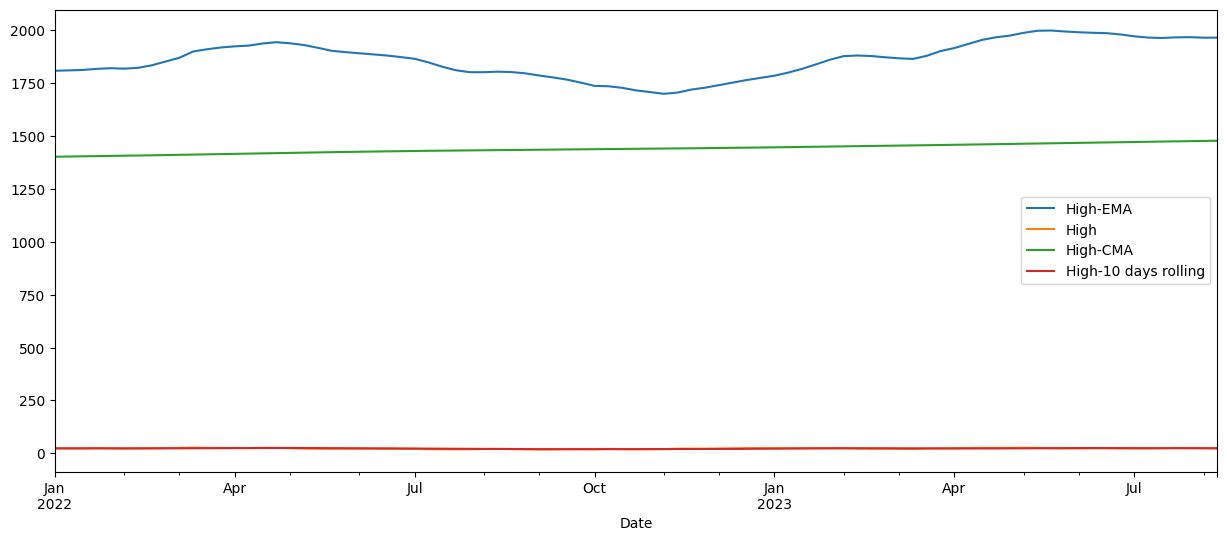

In [ ]:
silver_df[['High-EMA','High','High-CMA','High-10 days rolling']].plot(figsize=(15,6),xlim=('2022-01-01','2023-08-10'))

<Axes: xlabel='Date'>

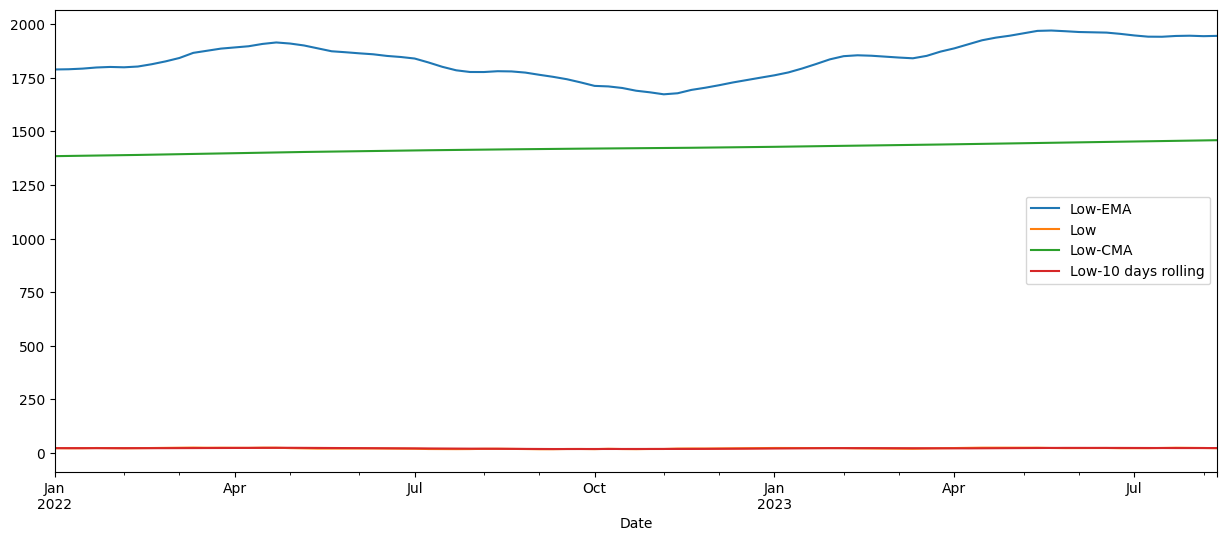

In [ ]:
silver_df[['Low-EMA','Low','Low-CMA','Low-10 days rolling']].plot(figsize=(15,6),xlim=('2022-01-01','2023-08-10'))

<Axes: xlabel='Date'>

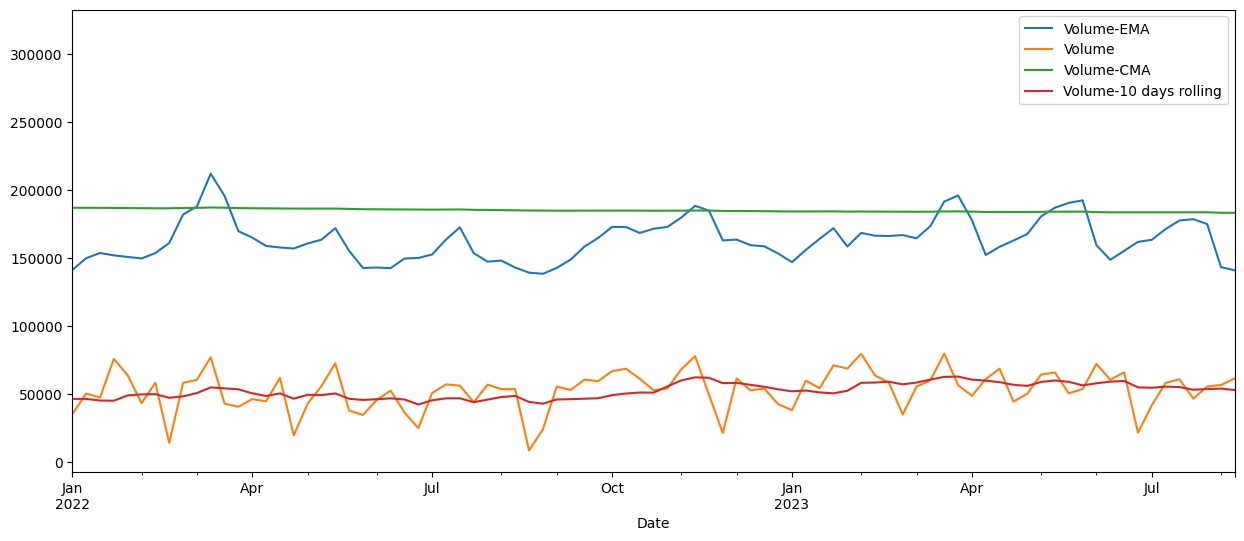

In [ ]:
silver_df[['Volume-EMA','Volume','Volume-CMA','Volume-10 days rolling']].plot(figsize=(15,6),xlim=('2022-01-01','2023-08-10'))

As of now above analysis it is being came out that Exponential moving averag is most sensitive out of all the moving averages methods

#Exponential weighted moving average

In [ ]:
gold_df['Open-EWMA']=gold_df['Open'].ewm(span=10).mean()
gold_df['Close/Last-EWMA']=gold_df['Close/Last'].ewm(span=10).mean()
gold_df['Volume-EWMA']=gold_df['Volume'].ewm(span=10).mean()
gold_df['High-EWMA']=gold_df['High'].ewm(span=10).mean()
gold_df['Low-EWMA']=gold_df['Low'].ewm(span=10).mean()

<Axes: xlabel='Date'>

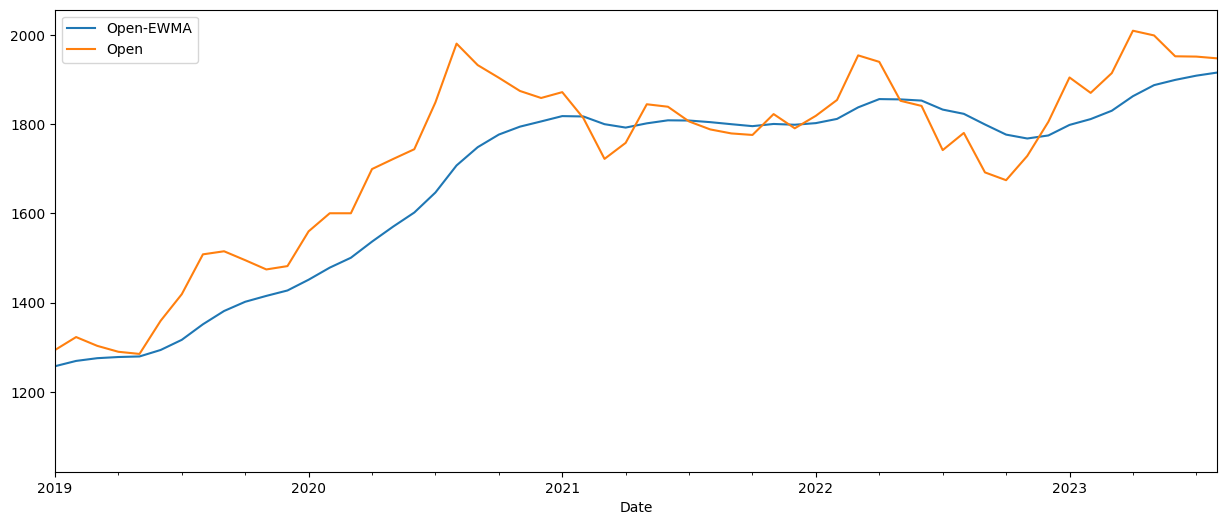

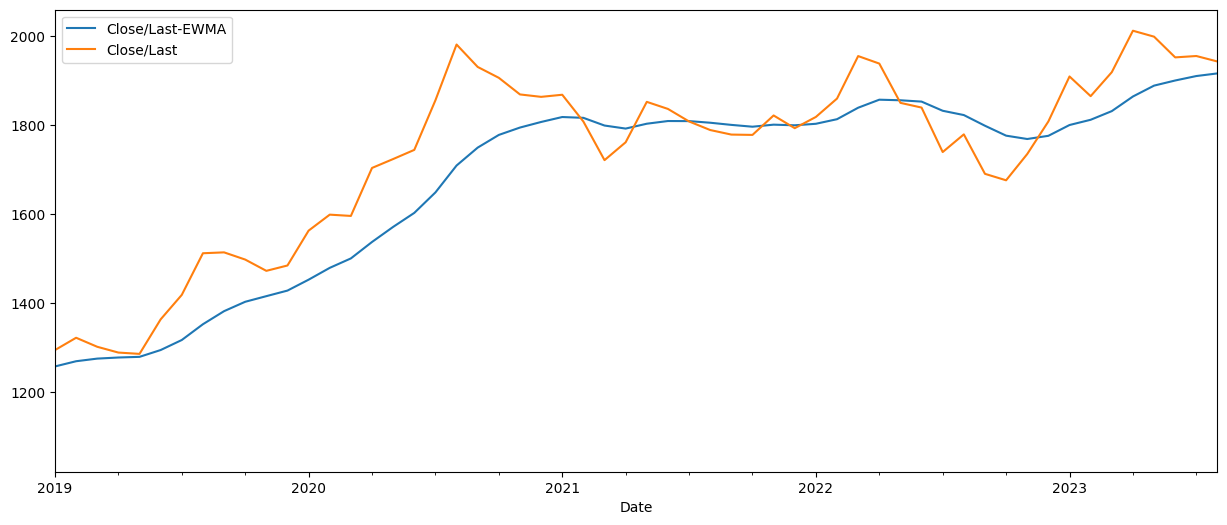

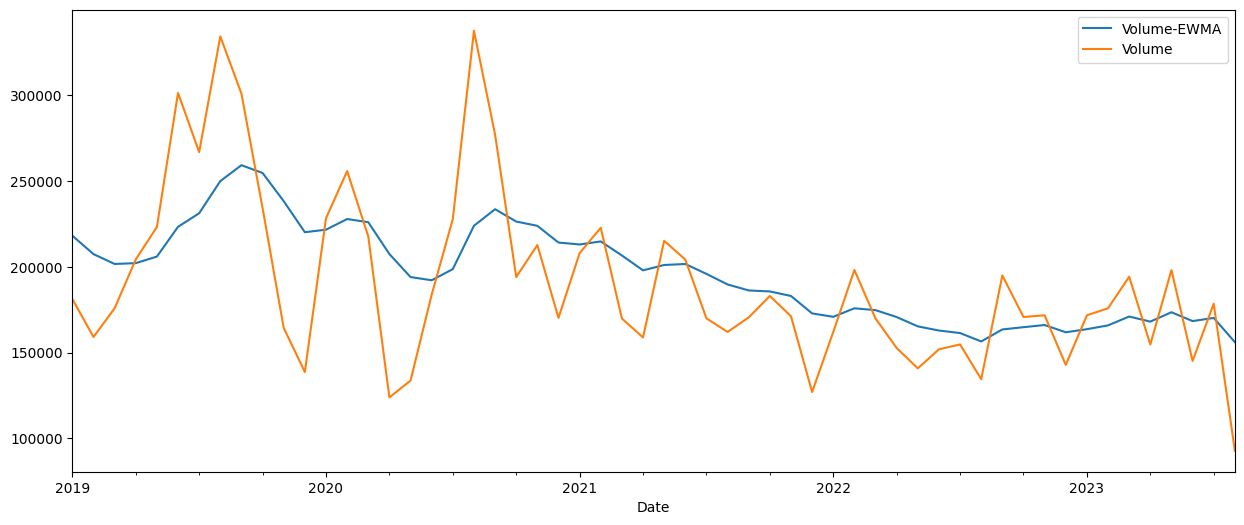

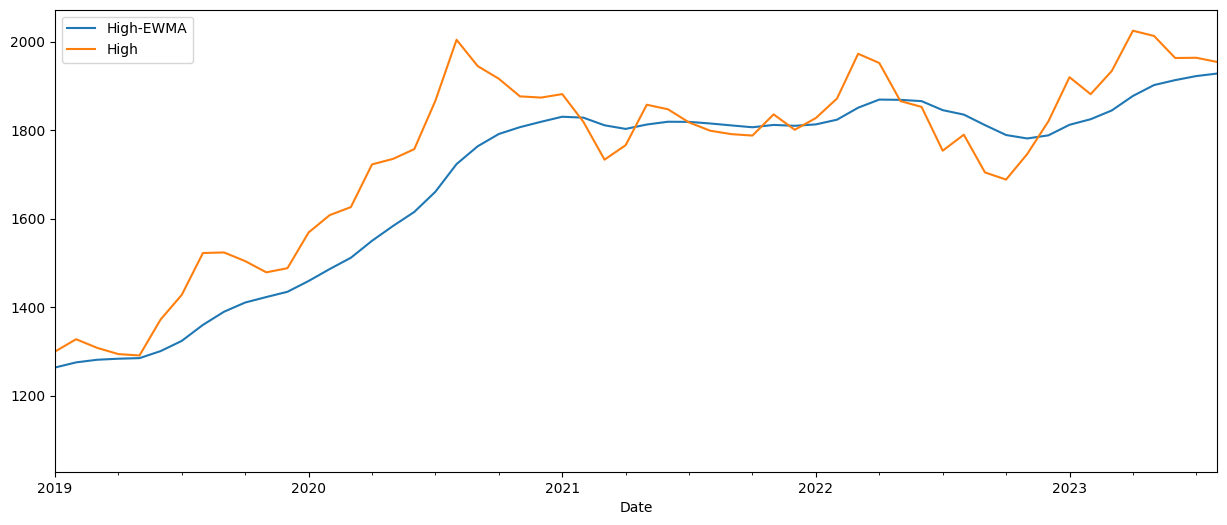

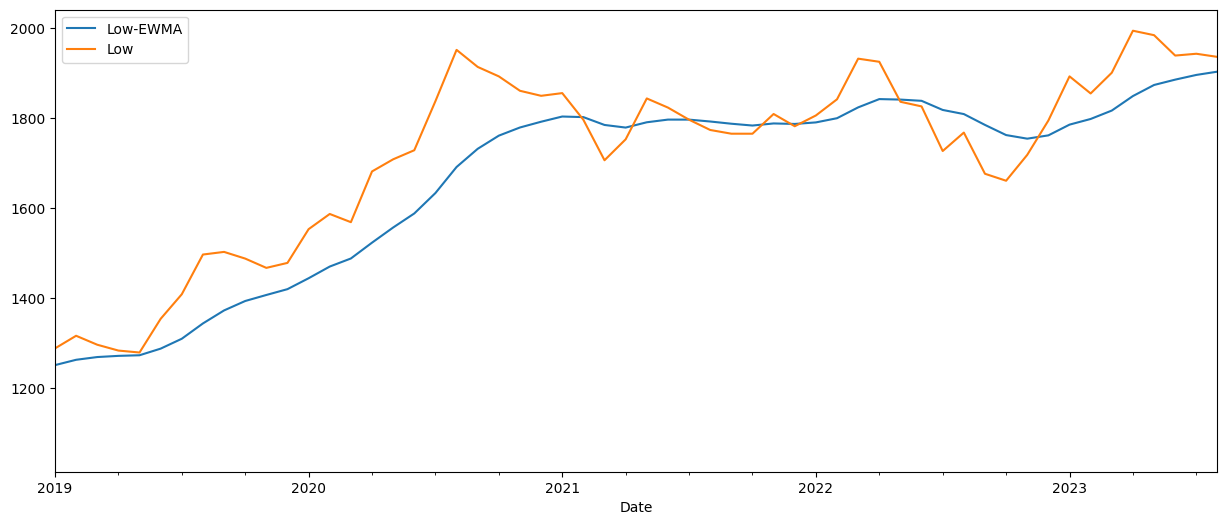

In [ ]:
gold_df[['Open-EWMA','Open']].plot(figsize=(15,6),xlim=('2019-01-01','2023-08-10'))
gold_df[['Close/Last-EWMA','Close/Last']].plot(figsize=(15,6),xlim=('2019-01-01','2023-08-10'))
gold_df[['Volume-EWMA','Volume']].plot(figsize=(15,6),xlim=('2019-01-01','2023-08-10'))
gold_df[['High-EWMA','High']].plot(figsize=(15,6),xlim=('2019-01-01','2023-08-10'))
gold_df[['Low-EWMA','Low']].plot(figsize=(15,6),xlim=('2019-01-01','2023-08-10'))

<Axes: xlabel='Date'>

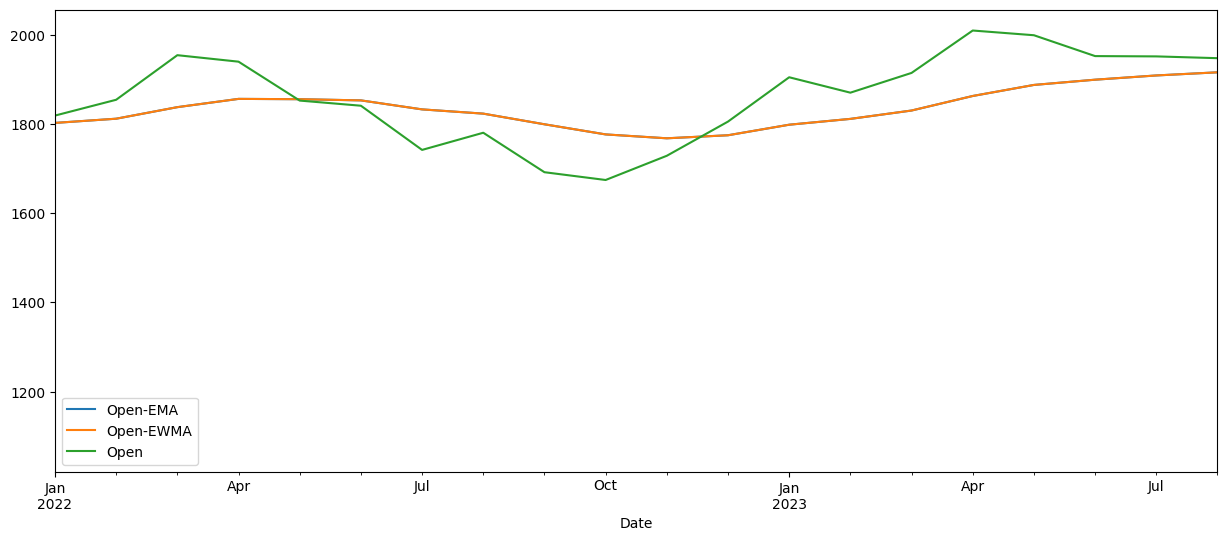

In [ ]:
gold_df[['Open-EMA','Open-EWMA','Open']].plot(figsize=(15,6),xlim=('2022-01-01','2023-08-10'))

As EMA AND EWMA LINES OVERLAPPING EACH OTHER SHOWING SAME RESULT


#Lets build the models
#Stationarity is a fundamental concept in time series analysis, and it's important for several reasons:

Modeling Assumptions: Many time series models, including basic ones like ARIMA (AutoRegressive Integrated Moving Average), assume stationarity. These models assume that the statistical properties of the time series (mean, variance, autocorrelation) do not change over time. If your data isn't stationary, these assumptions are violated, and the model's predictions and inferences can be unreliable.

Predictability: Stationary time series are often easier to predict and model accurately. When the statistical properties remain consistent over time, patterns observed in the past are more likely to continue into the future. Non-stationary series, on the other hand, might exhibit erratic behavior, making it challenging to make accurate forecasts.

Statistical Properties: Many statistical tests and methods assume stationarity to provide meaningful results. For instance, hypothesis tests, confidence intervals, and parameter estimation rely on the assumption of constant statistical properties.

Meaningful Trends and Patterns: In non-stationary series, trends and patterns can obscure the underlying dynamics of the data. By detrending or differencing to achieve stationarity, you can often expose more meaningful patterns and relationships.

Causality and Interpretability: In non-stationary data, correlation does not necessarily imply causation. Changes in the variables might be driven by other factors rather than a direct causal relationship.

Comparison and Aggregation: Stationary series are more suitable for making meaningful comparisons and aggregations over time. When working with non-stationary data, differences in mean and variance can lead to misleading conclusions when comparing different time periods or aggregating data.

Stability and Control: Stationary processes are generally more stable and easier to control. In many real-world scenarios, stable processes are desirable for making informed decisions.

Econometric Analysis: In econometrics and social sciences, stationarity is often a requirement to analyze relationships between variables correctly.

To summarize, stationarity simplifies modeling, enhances predictability, facilitates meaningful statistical analysis, and allows for more accurate interpretation of the underlying dynamics of the time series. However, it's important to note that not all time series need to be stationary for analysis; there are techniques, such as cointegration, that deal with non-stationary series in specific contexts.

#Autocorrelation Function (ACF), Partial Autocorrelation Function (PACF), and the Dickey-Fuller test play crucial roles in time series analysis. They help you understand the patterns, characteristics, and stationarity of your time series data. Here's what each of them does:

Autocorrelation Function (ACF):

The ACF measures the correlation between a time series and its lagged values. It shows how a data point at a given time relates to its past values at different lags.
ACF plots are used to identify the potential order of the Moving Average (MA) component in an ARIMA model. If there are significant autocorrelations at specific lags, it suggests that the past values at those lags could be used to predict the current value.
Partial Autocorrelation Function (PACF):

The PACF measures the correlation between a time series and its lagged values, excluding the contributions of the intermediate lags.
PACF plots help identify the potential order of the AutoRegressive (AR) component in an ARIMA model. It helps distinguish the direct relationship between a data point and its past values from the indirect relationships mediated by intermediate lags.
Dickey-Fuller Test:

The Dickey-Fuller test is a statistical test used to determine whether a time series is stationary or not. It checks for the presence of a unit root in the series.
The test has a null hypothesis that the time series has a unit root (i.e., non-stationary). If the test statistic is less than the critical value at a certain confidence level or if the p-value is below a significance threshold (like 0.05), you can reject the null hypothesis and conclude that the time series is stationary.
The roles of these tools in a time series problem can be summarized as follows:

Understanding Patterns: ACF and PACF plots provide insights into the temporal relationships within a time series. They help identify potential patterns, such as seasonality and autocorrelation, which are essential for building accurate models.

Model Component Identification: ACF and PACF plots guide you in identifying the orders of the AR and MA components in an ARIMA model. These components capture the dependencies on past values and past errors, respectively.

Assessing Stationarity: The Dickey-Fuller test helps you assess whether your time series is stationary or not. Stationarity is important because many time series models, including ARIMA, assume that the statistical properties of the series remain constant over time.

By utilizing ACF, PACF, and the Dickey-Fuller test, you can gain a deeper understanding of your time series data, determine appropriate model components, and make informed decisions about model selection and forecasting.

#Before fitting an ARIMA (AutoRegressive Integrated Moving Average) model to a time series dataset, there are several key points to consider. Ensuring that you have a solid foundation will increase the likelihood of building an effective and accurate model. Here are some important keypoints to keep in mind:

Data Exploration and Visualization:

Understand the data's underlying patterns, trends, and seasonality.
Plot the time series data to visualize its behavior and identify any potential outliers or anomalies.
Stationarity:

Check for stationarity in the time series. ARIMA models assume stationarity.
Use statistical tests like the Augmented Dickey-Fuller (ADF) test to assess stationarity.
If the data is not stationary, consider differencing to achieve stationarity.
Differencing:

Decide on the order of differencing (if necessary) by observing the ACF or performing the Dickey-Fuller test.
Differencing transforms the data to stabilize the mean and variance, making it suitable for ARIMA modeling.
ACF and PACF Analysis:

Examine the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots to determine potential orders for the AR and MA components.
Model Order Selection:

Perform a grid search or use automated methods to determine the optimal orders for the ARIMA model.
Balance model complexity with goodness-of-fit criteria like AIC or BIC.
Train-Test Split:

Split your data into a training set and a validation (or test) set.
The training set is used to fit the model, while the validation set helps evaluate its performance.
Model Fitting:

Fit the ARIMA model using the training data.
Specify the chosen values for the AR (p), differencing (d), and MA (q) orders.
Model Diagnostic Checking:

Examine the residuals of the fitted model to ensure they are white noise (uncorrelated and normally distributed).
Plot the residuals and perform statistical tests to validate the model's assumptions.
Forecasting and Evaluation:

Use the fitted ARIMA model to make forecasts on the validation set.
Evaluate the forecast accuracy using appropriate metrics like Mean Squared Error (MSE) or Mean Absolute Error (MAE).
Parameter Interpretation:

Understand the estimated coefficients and their significance in the context of the model.
Interpret the impact of past values on the current value in the time series.
Model Iteration and Improvement:

Iterate through the above steps, refining the model as needed based on diagnostics and forecast accuracy.
Domain Knowledge:

Incorporate domain knowledge if available to guide the model selection and interpretation process.

In [ ]:
#importing dicky fuller tool
from statsmodels.tsa.stattools import adfuller

In [ ]:
gold_df.head()

Close/Last     Volume      Open     High       Low     Open-CMA  \
Date                                                                          
2013-08-25    1375.000  133422.20  1370.940  1384.46  1359.020  1370.940000   
2013-09-01    1408.220  131111.80  1412.500  1417.58  1398.140  1391.720000   
2013-09-08    1390.375  161201.75  1390.375  1406.25  1370.425  1391.271667   
2013-09-15    1350.740  123867.20  1358.040  1370.42  1344.520  1382.963750   
2013-09-22    1327.320  165609.40  1335.500  1352.64  1318.040  1373.471000   

            Close/Last-CMA     Volume-CMA     High-CMA      Low-CMA  
Date                                                                 
2013-08-25     1375.000000  133422.200000  1384.460000  1359.020000  
2013-09-01     1391.610000  132267.000000  1401.020000  1378.580000  
2013-09-08     1391.198333  141911.916667  1402.763333  1375.861667  
2013-09-15     1381.083750  137400.737500  1394.677500  1368.026250  
2013-09-22     1370.331000  143042.470000  1386.270000  1358.029000

In [ ]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adf_test(gold_df['Close/Last'])

ADF Statistics: -0.39892399375251114
p- value: 0.9102782769234785
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
#As this column is not Stationary for fitting Arima Model it is necessary a dataset to be stationary
#we will make it stationary by Differenting technique
gold_df['Close/Last-First Differenting']=gold_df['Close/Last']-gold_df['Close/Last'].shift(1)


In [ ]:
#gold_df['Close/Last-12 month Differenting']=gold_df['Close/Last']-gold_df['Close/Last'].shift(12)

In [ ]:
gold_df.dropna(inplace=True)

In [ ]:
gold_df.isna().sum()

Close/Last                       0
Volume                           0
Open                             0
High                             0
Low                              0
Open-CMA                         0
Close/Last-CMA                   0
Volume-CMA                       0
High-CMA                         0
Low-CMA                          0
Close/Last-First Differenting    0
dtype: int64

In [ ]:
gold_df.dropna(inplace=True)

In [ ]:
#After shifting one step Again applying dickey fuller test to check the stationarity
adf_test(gold_df['Close/Last-First Differenting'])

ADF Statistics: -12.510582419615968
p- value: 2.6798845573958523e-23
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
adf_test(gold_df['Volume'])

ADF Statistics: -2.4805263141776868
p- value: 0.1202846628239464
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
gold_df['Volume-First_Differenting']=gold_df['Volume']-gold_df['Volume'].shift(1)

In [ ]:
#gold_df['Volume-12 month Differenting']=gold_df['Volume']-gold_df['Volume'].shift(12)

In [ ]:
gold_df.dropna(inplace=True)

In [ ]:
adf_test(gold_df['Volume'])

ADF Statistics: -2.547680745320045
p- value: 0.1042997521718022
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
#adf_test(gold_df['Volume-12 month Differenting'])

ADF Statistics: -3.3834288434424744
p- value: 0.011536920848423487
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
adf_test(gold_df['Open'])

ADF Statistics: -0.3911973659168462
p- value: 0.9115581600303067
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
gold_df['Open-First Differenting']=gold_df['Open']-gold_df['Open'].shift(1)

In [ ]:
#gold_df['Open-12 month Differenting']=gold_df['Open']-gold_df['Open'].shift(12)

In [ ]:
gold_df.dropna(inplace=True)

In [ ]:
adf_test(gold_df['Open-First Differenting'])

ADF Statistics: -12.5347124265897
p- value: 2.3857749839205507e-23
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
adf_test(gold_df['High'])

ADF Statistics: -0.6530039957437387
p- value: 0.8585500426949391
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
gold_df['High-First Differenting']=gold_df['High']-gold_df['High'].shift(1)

In [ ]:
#gold_df['High-12 month Differenting']=gold_df['High']-gold_df['High'].shift(12)

In [ ]:
gold_df.dropna(inplace=True)

In [ ]:
adf_test(gold_df['High-First Differenting'])

ADF Statistics: -19.85082099591913
p- value: 0.0
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
adf_test(gold_df['Low'])

ADF Statistics: -0.4065298171222503
p- value: 0.9090028096505317
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
gold_df['Low-First Differenting']=gold_df['Low']-gold_df['Low'].shift(1)

In [ ]:
#gold_df['Low-12 month Differenting']=gold_df['Low']-gold_df['Low'].shift(12)

In [ ]:
gold_df.dropna(inplace=True)

In [ ]:
adf_test(gold_df['Low-First Differenting'])

ADF Statistics: -12.505898874643304
p- value: 2.741138324107069e-23
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


#We have made our dataset stationary by differenting technique

In [ ]:
gold_df.head()

Close/Last    Volume     Open     High      Low     Open-CMA  \
Date                                                                       
2013-09-29     1328.56  132238.4  1325.76  1336.98  1314.94  1365.519167   
2013-10-06     1312.26  138297.6  1315.38  1332.92  1297.68  1358.356429   
2013-10-13     1304.40  128029.8  1302.30  1318.08  1293.66  1351.349375   
2013-10-20     1293.94  145128.0  1292.66  1304.32  1274.58  1344.828333   
2013-10-27     1339.04  107681.4  1330.20  1343.90  1323.10  1343.365500   

            Close/Last-CMA     Volume-CMA     High-CMA      Low-CMA  \
Date                                                                  
2013-09-29     1363.369167  141241.791667  1378.055000  1350.847500   
2013-10-06     1356.067857  140821.192857  1371.607143  1343.252143   
2013-10-13     1349.609375  139222.268750  1364.916250  1337.053125   
2013-10-20     1343.423889  139878.461111  1358.183333  1330.111667   
2013-10-27     1342.985500  136658.755000  1356.755000  1329.410500   

            Close/Last-First Differenting  Volume-First Differenting  \
Date                                                                   
2013-09-29                           1.24                   -33371.0   
2013-10-06                         -16.30                     6059.2   
2013-10-13                          -7.86                   -10267.8   
2013-10-20                         -10.46                    17098.2   
2013-10-27                          45.10                   -37446.6   

            Open-First Differenting  High-First Differenting  \
Date                                                           
2013-09-29                    -9.74                   -15.66   
2013-10-06                   -10.38                    -4.06   
2013-10-13                   -13.08                   -14.84   
2013-10-20                    -9.64                   -13.76   
2013-10-27                    37.54                    39.58   

            Low-First Differenting  
Date                                
2013-09-29                   -3.10  
2013-10-06                  -17.26  
2013-10-13                   -4.02  
2013-10-20                  -19.08  
2013-10-27                   48.52

#Our second step is to plot "Partial autocorrelation graph for-AR-Auto regression and Auto correlation graph for Moving average" to know the lag values

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

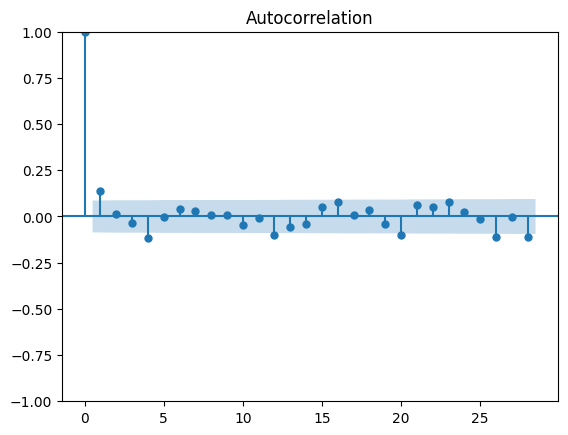

In [ ]:
acf_close_last=plot_acf(gold_df['Close/Last-First Differenting'])

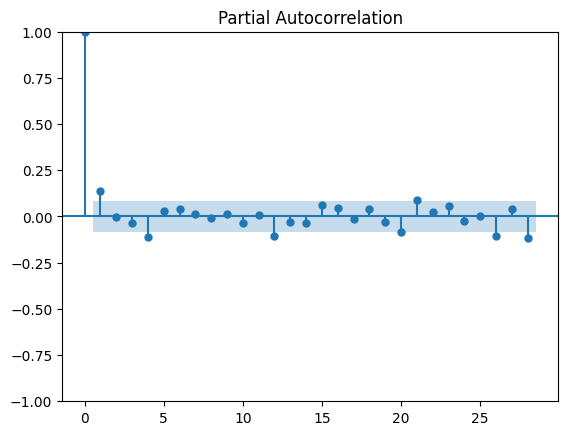

In [ ]:
pacf_close_last=plot_pacf(gold_df['Close/Last-First Differenting'])

In [ ]:
#acf_close_last_12=plot_acf(gold_df['Close/Last-12 month Differenting'])

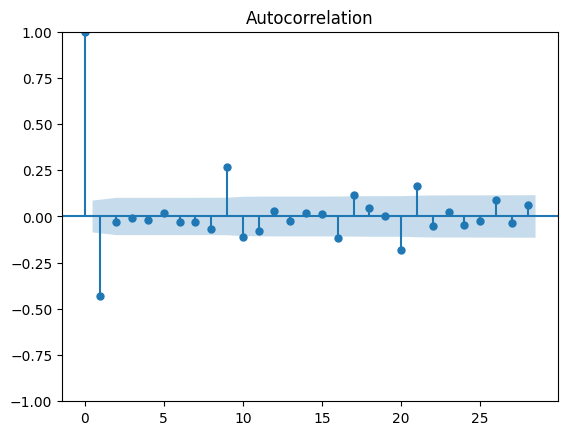

In [ ]:
acf_Volume=plot_acf(gold_df['Volume-First Differenting'])

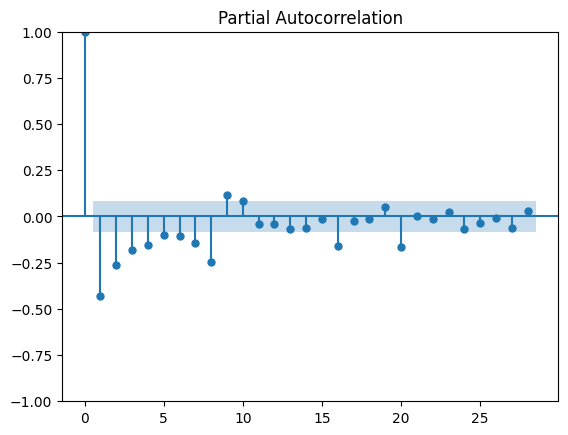

In [ ]:
pacf_Volume=plot_pacf(gold_df['Volume-First Differenting'])

In [ ]:
#acf_volume_12=plot_acf(gold_df['Volume-12 month Differenting'])

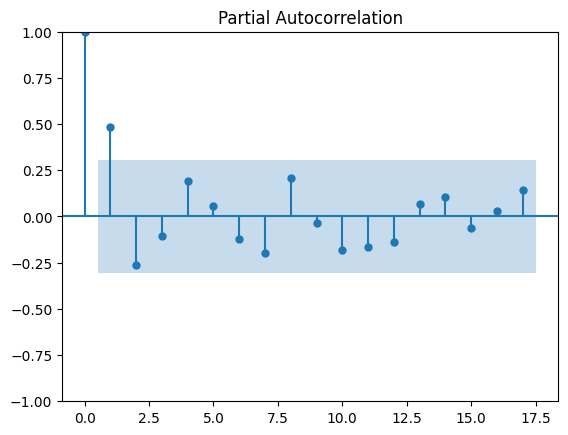

In [ ]:
#pacf_volume_12=plot_pacf(gold_df['Volume-12 month Differenting'])

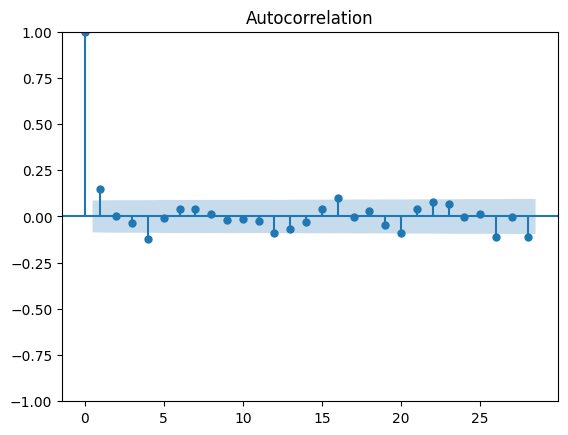

In [ ]:
acf_open=plot_acf(gold_df['Open-First Differenting'])

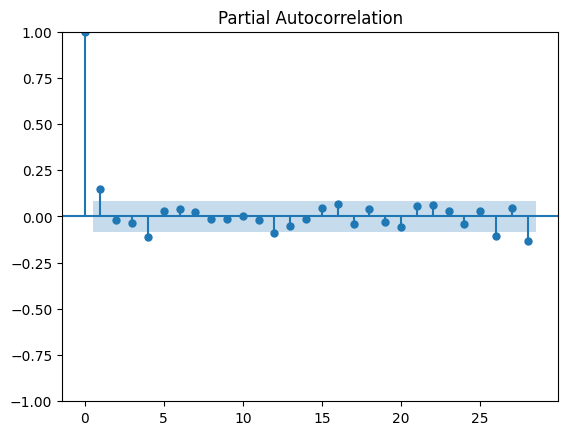

In [ ]:
pacf_open=plot_pacf(gold_df['Open-First Differenting'])

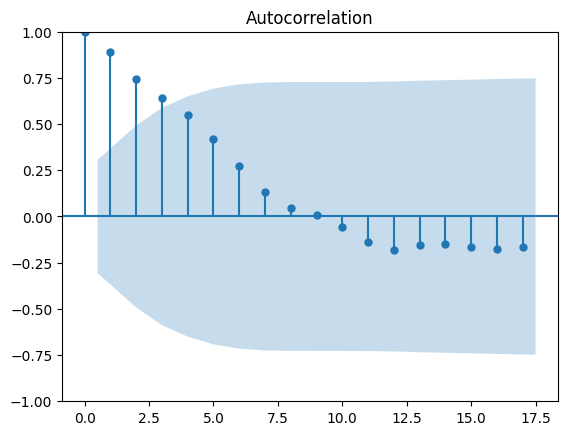

In [ ]:
#acf_open_12=plot_acf(gold_df['Open-12 month Differenting'])

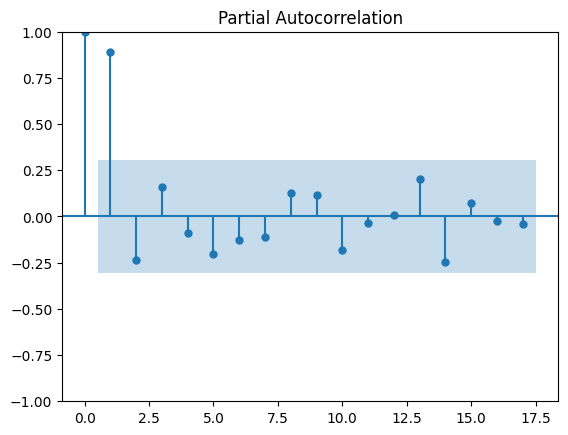

In [ ]:
#pacf_open_12=plot_pacf(gold_df['Open-12 month Differenting'])

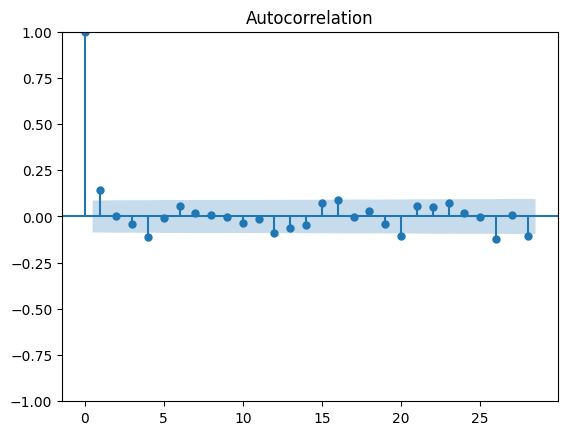

In [ ]:
acf_Low=plot_acf(gold_df['Low-First Differenting'])

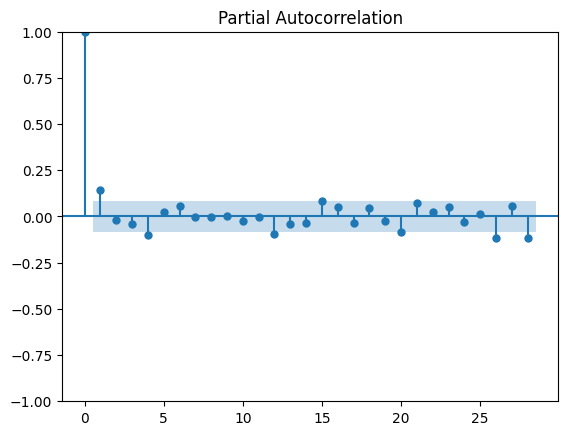

In [ ]:
pacf_Low=plot_pacf(gold_df['Low-First Differenting'])

In [ ]:
#acf_Low_12=plot_acf(gold_df['Low-12 month Differenting'])

In [ ]:
#pacf_Low_12=plot_pacf(gold_df['Low-12 month Differenting'])

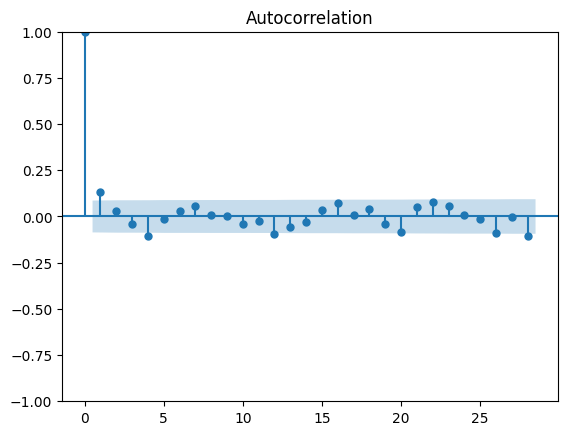

In [ ]:
acf_High=plot_acf(gold_df['High-First Differenting'])

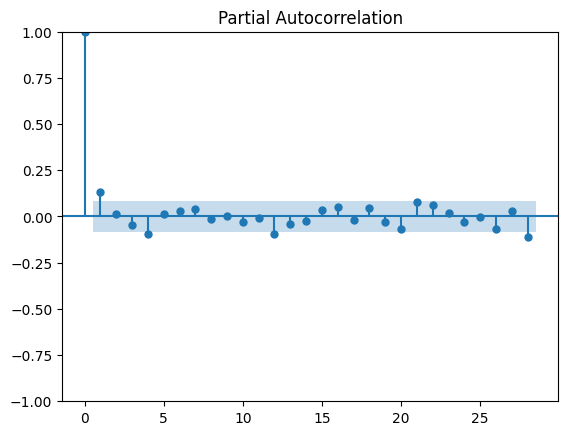

In [ ]:
pacf_High=plot_pacf(gold_df['High-First Differenting'])

In [ ]:
#acf_High_12=plot_acf(gold_df['High-12 month Differenting'])

In [ ]:
#pacf_High_12=plot_pacf(gold_df['High-12 month Differenting'])

#SPLITTING THE DATA

In [ ]:
volume=gold_df[['Volume','Volume-First Differenting']]

In [ ]:
volume

Volume  Volume-First Differenting
Date                                           
2013-09-29  132238.4                   -33371.0
2013-10-06  138297.6                     6059.2
2013-10-13  128029.8                   -10267.8
2013-10-20  145128.0                    17098.2
2013-10-27  107681.4                   -37446.6
...              ...                        ...
2023-07-23  182801.6                   -23441.6
2023-07-30  159138.8                   -23662.8
2023-08-06     685.6                  -158453.2
2023-08-13  130677.0                   129991.4
2023-08-20  137640.5                     6963.5

[517 rows x 2 columns]

In [ ]:
from datetime import timedelta

In [ ]:
volume=volume.sort_values(by='Date')

In [ ]:
# Define the split date
split_date = '2020-01-01'

# Split the data into training and testing sets
train_data = volume[volume.index < split_date]
test_data = volume[volume.index >= split_date]

In [ ]:
train_data

Volume  Volume-First Differenting
Date                                           
2013-09-29  132238.4                   -33371.0
2013-10-06  138297.6                     6059.2
2013-10-13  128029.8                   -10267.8
2013-10-20  145128.0                    17098.2
2013-10-27  107681.4                   -37446.6
...              ...                        ...
2019-12-01  185111.5                    89718.9
2019-12-08  170070.8                   -15040.7
2019-12-15  161645.4                    -8425.4
2019-12-22  103837.4                   -57808.0
2019-12-29  141045.5                    37208.1

[327 rows x 2 columns]

In [ ]:
test_data

Volume  Volume-First Differenting
Date                                            
2020-01-05  107022.00                  -34023.50
2020-01-12  419784.80                  312762.80
2020-01-19  234272.40                 -185512.40
2020-01-26   85480.75                 -148791.65
2020-02-02  184646.40                   99165.65
...               ...                        ...
2023-07-23  182801.60                  -23441.60
2023-07-30  159138.80                  -23662.80
2023-08-06     685.60                 -158453.20
2023-08-13  130677.00                  129991.40
2023-08-20  137640.50                    6963.50

[190 rows x 2 columns]

In [ ]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model_Arima=ARIMA(train_data['Volume'],order=(9,1,8))

In [ ]:
model_Arima_fit=model_Arima.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Volume   No. Observations:                  327
Model:                 ARIMA(9, 1, 8)   Log Likelihood               -3962.211
Date:                Sat, 02 Sep 2023   AIC                           7960.422
Time:                        06:58:32   BIC                           8028.586
Sample:                    09-29-2013   HQIC                          7987.623
                         - 12-29-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9182      0.125     -7.351      0.000      -1.163      -0.673
ar.L2         -0.2783      0.175     -1.592      0.111      -0.621       0.064
ar.L3         -0.8821      0.132     -6.671      0.000      -1.141      -0.623
ar.L4         -0.8814      0.140     -6.301      0.000      -1.156      -0.607
ar.L5         -0.2710      0.169     -1.604      0.109      -0.602       0.060
ar.L6         -0.8555      0.126     -6.783      0.000      -1.103      -0.608
ar.L7         -0.8833      0.140     -6.294      0.000      -1.158      -0.608
ar.L8          0.1090      0.175      0.621      0.535      -0.235       0.453
ar.L9          0.1027      0.097      1.057      0.290      -0.088       0.293
ma.L1          0.1599      0.110      1.455      0.146      -0.056       0.375
ma.L2         -0.3151      0.119     -2.645      0.008      -0.549      -0.082
ma.L3          0.6943      0.086      8.080      0.000       0.526       0.863
ma.L4          0.1850      0.113      1.635      0.102      -0.037       0.407
ma.L5         -0.3475      0.111     -3.132      0.002      -0.565      -0.130
ma.L6          0.6099      0.092      6.654      0.000       0.430       0.790
ma.L7          0.2135      0.094      2.268      0.023       0.029       0.398
ma.L8         -0.7400      0.098     -7.520      0.000      -0.933      -0.547
sigma2      2.361e+09   7.82e-11   3.02e+19      0.000    2.36e+09    2.36e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                43.63
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               3.72   Skew:                             0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number  3e+35. Standard errors may be unstable.
"""

In [ ]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Volume']-pred

In [ ]:
pred

2020-01-05    162309.010609
2020-01-12    175811.132003
2020-01-19    131943.204902
2020-01-26    128693.518979
2020-02-02    148504.502237
                  ...      
2023-07-23    144498.896913
2023-07-30    163990.347729
2023-08-06    179230.249569
2023-08-13    164090.502290
2023-08-20    140209.192041
Freq: W-SUN, Name: predicted_mean, Length: 190, dtype: float64

<Axes: ylabel='Density'>

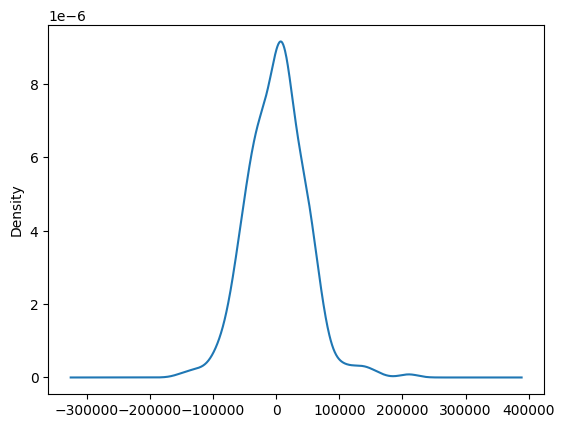

In [ ]:
model_Arima_fit.resid.plot(kind='kde')

In [ ]:
test_data['Predicted_ARIMA']=pred

<ipython-input-141-69896c9f46c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<Axes: xlabel='Date'>

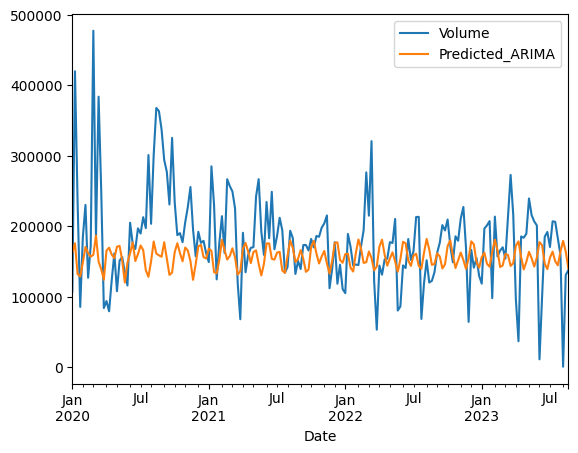

In [ ]:
test_data[['Volume','Predicted_ARIMA']].plot()

In [ ]:
close_last=gold_df[['Close/Last','Close/Last-First_Differenting']]

KeyError: ignored

In [ ]:
close_last

Close/Last  Close/Last-First Differenting
Date                                                  
2014-01-31  1243.457143                      19.538095
2014-02-28  1300.721053                      57.263910
2014-03-31  1336.528571                      35.807519
2014-04-30  1298.747619                     -37.780952
2014-05-31  1287.809524                     -10.938095
...                 ...                            ...
2023-04-30  2011.273684                      93.064989
2023-05-31  1997.940909                     -13.332775
2023-06-30  1951.438095                     -46.502814
2023-07-31  1954.510000                       3.071905
2023-08-31  1942.184615                     -12.325385

[116 rows x 2 columns]

In [ ]:
close_last=close_last.sort_values(by='Date')

In [ ]:
# Define the split date
split_date = '2020-01-01'

# Split the data into training and testing sets
train_data = close_last-First_Differenting[close_last-First_Differenting.index < split_date]
test_data = close_last-First_Differenting[close_last-First_Differenting.index >= split_date]

SyntaxError: ignored

In [ ]:
model_Arima=ARIMA(train_data['Close/Last-First Differenting'],order=(4,1,4))

In [ ]:
model_Arima_fit2=model_Arima.fit()

In [ ]:
model_Arima_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Close/Last   No. Observations:                  327
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -1399.683
Date:                Sat, 02 Sep 2023   AIC                           2817.366
Time:                        07:00:58   BIC                           2851.448
Sample:                    09-29-2013   HQIC                          2830.966
                         - 12-29-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0614      0.688      0.089      0.929      -1.286       1.409
ar.L2         -0.1985      0.445     -0.446      0.656      -1.071       0.674
ar.L3         -0.1747      0.467     -0.374      0.708      -1.090       0.741
ar.L4         -0.2071      0.245     -0.845      0.398      -0.687       0.273
ma.L1          0.2643      0.696      0.380      0.704      -1.100       1.629
ma.L2          0.1081      0.403      0.268      0.789      -0.682       0.898
ma.L3          0.2955      0.454      0.651      0.515      -0.594       1.185
ma.L4          0.1486      0.417      0.356      0.721      -0.668       0.965
sigma2       313.5527     24.137     12.991      0.000     266.246     360.860
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.28
Prob(Q):                              0.99   Prob(JB):                         0.53
Heteroskedasticity (H):               0.74   Skew:                             0.05
Prob(H) (two-sided):                  0.11   Kurtosis:                         3.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
pred2=model_Arima_fit2.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Close/Last']-pred

<Axes: ylabel='Density'>

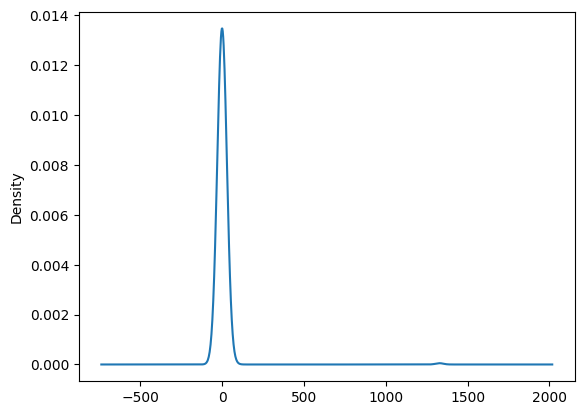

In [ ]:
model_Arima_fit2.resid.plot(kind='kde')

In [ ]:
test_data['Predicted_ARIMA']=pred2

<ipython-input-154-9a984da4fdb6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred2


<Axes: xlabel='Date'>

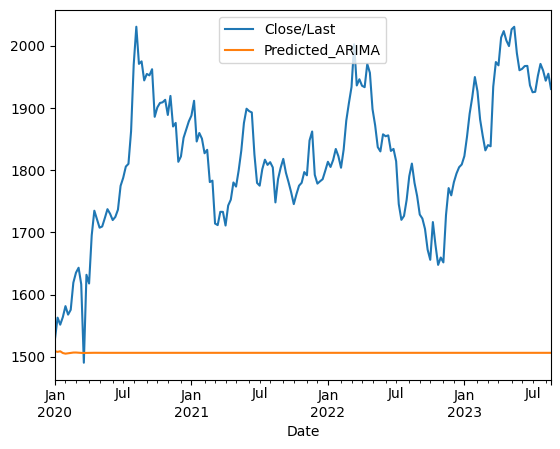

In [ ]:
test_data[['Close/Last','Predicted_ARIMA']].plot()